# Energy Usage Prediction - EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [4]:
train_path = 'data/train.csv'
test_path = 'data/test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

## Understanding the dataset

### 1 | Train set

In [5]:
train_df.head()

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  ...  \
0                11.0        2.4                36              50.5  ...   
1                45.0        1.8                36              50.5  ...   
2                97.0        1.8                36              50.5  ...   
3                46.0        1.8                36              50.5  ...   
4               100.0        2.4                36              50.5  ...   

   days_above_80F  days_above_90F  days_above_100F  days_above_110F  \
0              14               0                0                0   
1              14               0                0                0   
2              14               0                0                0   
3              14               0                0                0   
4              14               0                0                0   

   direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
0                       1.0                        1.0             1.0   
1                       1.0                        NaN             1.0   
2                       1.0                        NaN             1.0   
3                       1.0                        NaN             1.0   
4                       1.0                        1.0             1.0   

   days_with_fog    site_eui  id  
0            NaN  248.682615   0  
1           12.0   26.500150   1  
2           12.0   24.693619   2  
3           12.0   48.406926   3  
4            NaN    3.899395   4  

[5 rows x 64 columns]

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [7]:
train_df.shape

(75757, 64)

In [155]:
# columns with NAs
nas = pd.DataFrame(train_df.isna().sum().sort_values(ascending=False)).rename(columns={0: 'na_counts'})
nas['perc'] = nas.na_counts / len(train_df)
nas[nas.na_counts > 0]

na_counts      perc
days_with_fog                  45796  0.604512
direction_peak_wind_speed      41811  0.551909
max_wind_speed                 41082  0.542287
direction_max_wind_speed       41082  0.542287
energy_star_rating             26709  0.352561
year_built                      1843  0.024328

### 2 | Test set

In [9]:
test_df.head()

Year_Factor State_Factor building_class                 facility_type  \
0            7      State_1     Commercial  Grocery_store_or_food_market   
1            7      State_1     Commercial  Grocery_store_or_food_market   
2            7      State_1     Commercial  Grocery_store_or_food_market   
3            7      State_1     Commercial  Grocery_store_or_food_market   
4            7      State_1     Commercial  Grocery_store_or_food_market   

   floor_area  year_built  energy_star_rating  ELEVATION  january_min_temp  \
0     28484.0      1994.0                37.0        2.4                38   
1     21906.0      1961.0                55.0       45.7                38   
2     16138.0      1950.0                 1.0       59.1                38   
3     97422.0      1971.0                34.0       35.4                38   
4     61242.0      1942.0                35.0        1.8                38   

   january_avg_temp  ...  days_below_0F  days_above_80F  days_above_90F  \
0         50.596774  ...              0              29               5   
1         50.596774  ...              0              29               5   
2         50.596774  ...              0              29               5   
3         50.596774  ...              0              29               5   
4         50.596774  ...              0              29               5   

   days_above_100F  days_above_110F  direction_max_wind_speed  \
0                2                0                       NaN   
1                2                0                       NaN   
2                2                0                       NaN   
3                2                0                       NaN   
4                2                0                     340.0   

   direction_peak_wind_speed  max_wind_speed  days_with_fog     id  
0                        NaN             NaN            NaN  75757  
1                        NaN             NaN            NaN  75758  
2                        NaN             NaN            NaN  75759  
3                        NaN             NaN            NaN  75760  
4                      330.0            22.8          126.0  75761  

[5 rows x 63 columns]

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                9705 non-null   int64  
 1   State_Factor               9705 non-null   object 
 2   building_class             9705 non-null   object 
 3   facility_type              9705 non-null   object 
 4   floor_area                 9705 non-null   float64
 5   year_built                 9613 non-null   float64
 6   energy_star_rating         7451 non-null   float64
 7   ELEVATION                  9705 non-null   float64
 8   january_min_temp           9705 non-null   int64  
 9   january_avg_temp           9705 non-null   float64
 10  january_max_temp           9705 non-null   int64  
 11  february_min_temp          9705 non-null   int64  
 12  february_avg_temp          9705 non-null   float64
 13  february_max_temp          9705 non-null   int64

In [11]:
test_df.shape

(9705, 63)

In [156]:
# columns with NAs
test_nas = pd.DataFrame(test_df.isna().sum().sort_values(ascending=False)).rename(columns={0: 'na_counts'})
test_nas['perc'] = test_nas.na_counts / len(test_df)
test_nas[test_nas.na_counts > 0]

na_counts      perc
days_with_fog                   9117  0.939413
max_wind_speed                  8575  0.883565
direction_peak_wind_speed       8575  0.883565
direction_max_wind_speed        8575  0.883565
energy_star_rating              2254  0.232251
year_built                        93  0.009583

## Categorical variables

### 1 | Year Factor

- More data points in the later years in the train set (year 6 has the most number of data points - ~30%)
- Test set only contains year 7
- Mean eui in each year is around 80~90, Median is around 70~80
- A lot of outliers in eui 200+

In [13]:
yr_factor = train_df.groupby('Year_Factor').agg(
    counts=('Year_Factor', 'count'), eui_mean=('site_eui', 'mean'), eui_median=('site_eui', 'median')
    ).reset_index()
yr_factor['perc'] = yr_factor.counts / yr_factor.counts.sum()

test_yr_factor = test_df.groupby('Year_Factor').agg(counts=('Year_Factor', 'count')).reset_index()
test_yr_factor['perc'] = test_yr_factor.counts / test_yr_factor.counts.sum()

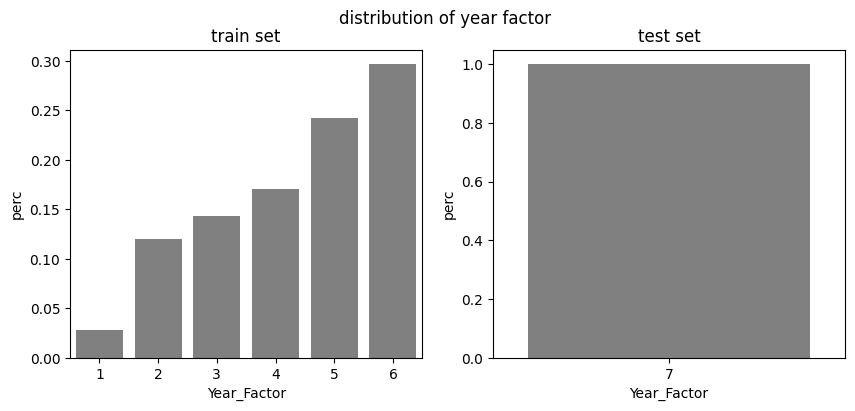

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
sns.barplot(data=yr_factor, x='Year_Factor', y='perc', color='gray', ax=axs[0])
sns.barplot(data=test_yr_factor, x='Year_Factor', y='perc', color='gray', ax=axs[1])
plt.suptitle('distribution of year factor')
axs[0].set_title('train set')
axs[1].set_title('test set')
plt.show()

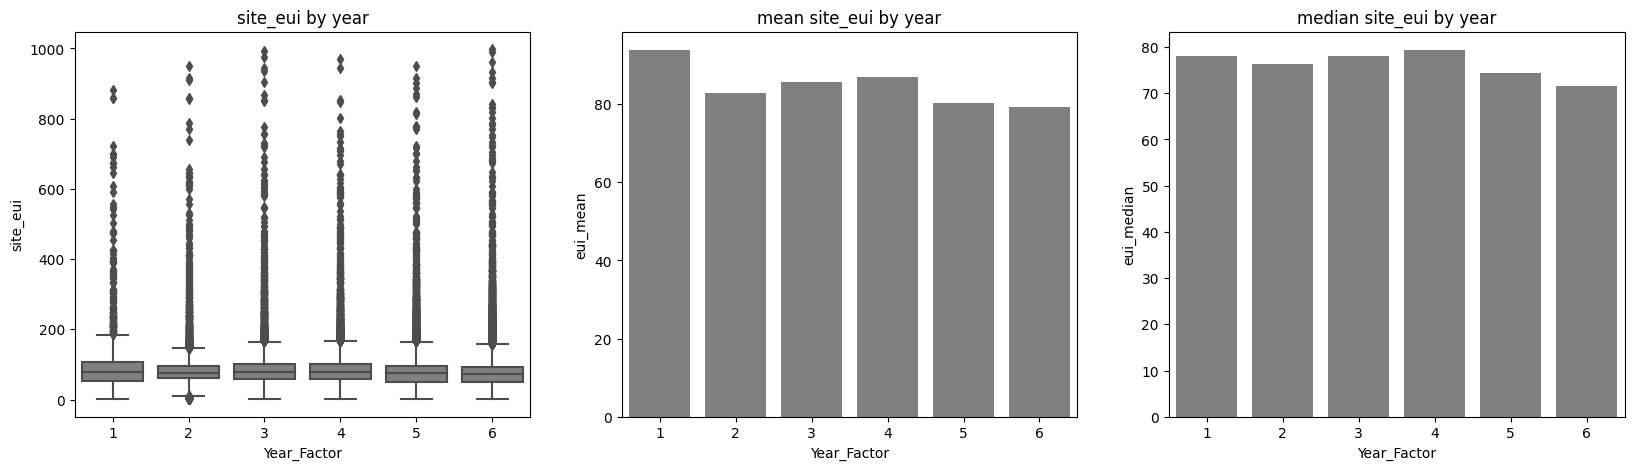

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.boxplot(data=train_df, x='Year_Factor', y='site_eui', color='gray', ax=axs[0])
axs[0].set_title('site_eui by year')
sns.barplot(data=yr_factor, x='Year_Factor', y='eui_mean', color='gray', ax=axs[1])
axs[1].set_title('mean site_eui by year')
sns.barplot(data=yr_factor, x='Year_Factor', y='eui_median', color='gray', ax=axs[2])
axs[2].set_title('median site_eui by year')
plt.show()

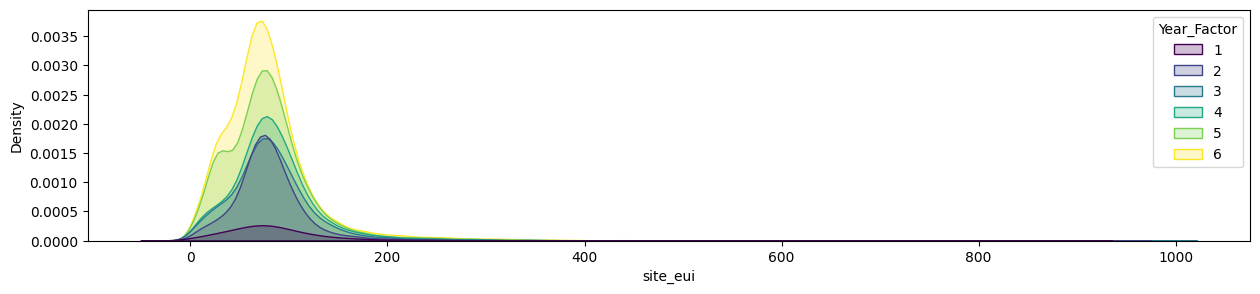

In [16]:
sns.kdeplot(data=train_df, x='site_eui', hue='Year_Factor', palette='viridis', fill=True)
fig = plt.gcf()
fig.set_size_inches(15, 3)
plt.show()

### 2 | State Factor

- While train set consists largely of State 8 (~70%), test set data is relatively more balanced
- State 11, 2 and 4 are overrepresented in test set, while State 8 is overrepresented in train set 
- Both sets contain very small percentage of State 10 data
- State 11 exhibits notably lower eui than other states 
- State 4 and 6 exhibit higher median eui than other states
- State 10 has a smaller variation in eui compared to other states

In [17]:
state_factor = train_df.groupby('State_Factor').agg(
    counts=('State_Factor', 'count'), eui_mean=('site_eui', 'mean'), eui_median=('site_eui', 'median')
    ).reset_index()
state_factor['perc'] = state_factor.counts / state_factor.counts.sum()

test_state_factor = test_df.groupby('State_Factor').agg(counts=('State_Factor', 'count')).reset_index()
test_state_factor['perc'] = test_state_factor.counts / test_state_factor.counts.sum()

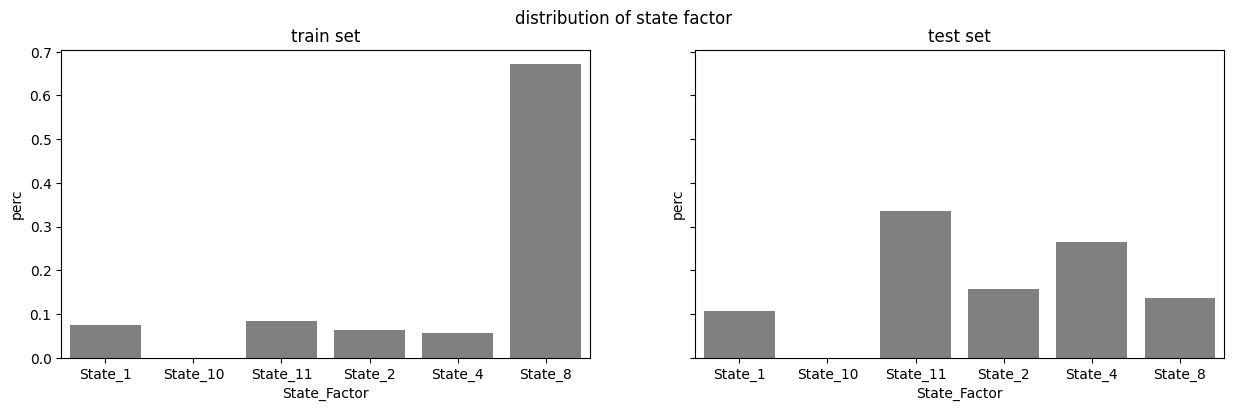

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4), sharex=True, sharey=True)
sns.barplot(data=state_factor, x='State_Factor', y='perc', color='gray', ax=axs[0])
sns.barplot(data=test_state_factor, x='State_Factor', y='perc', color='gray', ax=axs[1])
plt.suptitle('distribution of state factor')
axs[0].set_title('train set')
axs[1].set_title('test set')
plt.show()

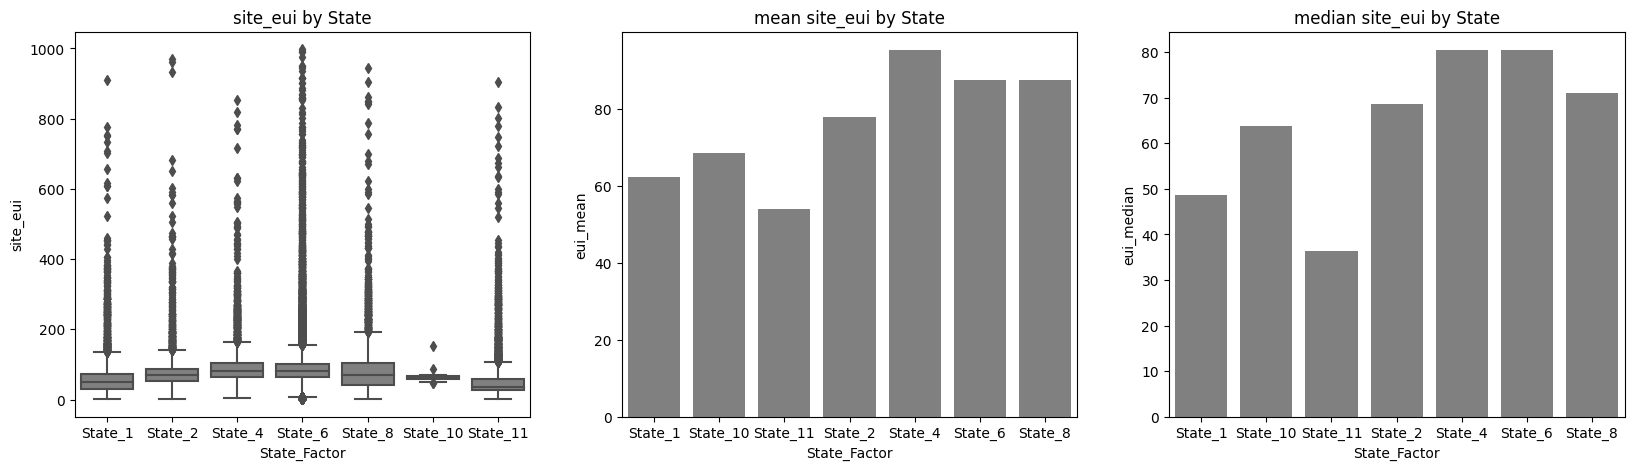

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.boxplot(data=train_df, x='State_Factor', y='site_eui', color='gray', ax=axs[0])
axs[0].set_title('site_eui by State')
sns.barplot(data=state_factor, x='State_Factor', y='eui_mean', color='gray', ax=axs[1])
axs[1].set_title('mean site_eui by State')
sns.barplot(data=state_factor, x='State_Factor', y='eui_median', color='gray', ax=axs[2])
axs[2].set_title('median site_eui by State')
plt.show()

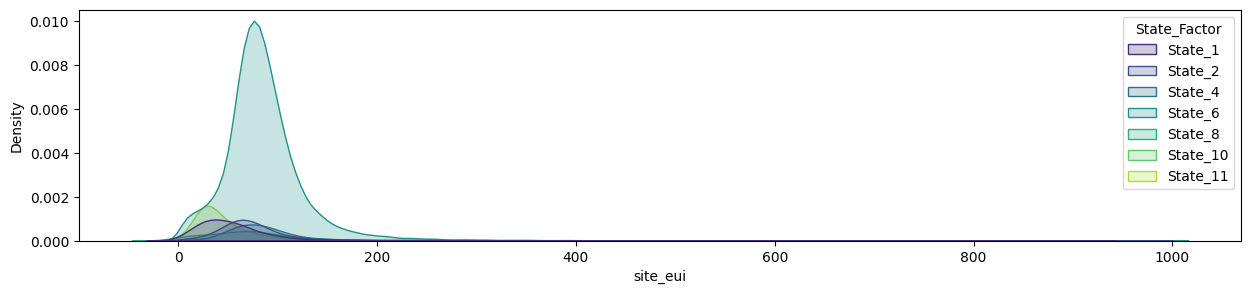

In [20]:
sns.kdeplot(data=train_df, x='site_eui', hue='State_Factor', palette='viridis', fill=True)
fig = plt.gcf()
fig.set_size_inches(15, 3)
plt.show()

### 3 | Building class

- While train set contains just under 60% of residential buildings and 40+% of commercial buildings, this pattern is reversed in the test set
- Commercial buildings exhibit higher variation in eui, and there are more commercial buildings in the higher end of eui 

In [21]:
bldg_class = train_df.groupby('building_class').agg(
    counts=('building_class', 'count'), eui_mean=('site_eui', 'mean'), eui_median=('site_eui', 'median')
    ).reset_index()
bldg_class['perc'] = bldg_class.counts / bldg_class.counts.sum()

test_bldg_class = test_df.groupby('building_class').agg(counts=('building_class', 'count')).reset_index()
test_bldg_class['perc'] = test_bldg_class.counts / test_bldg_class.counts.sum()

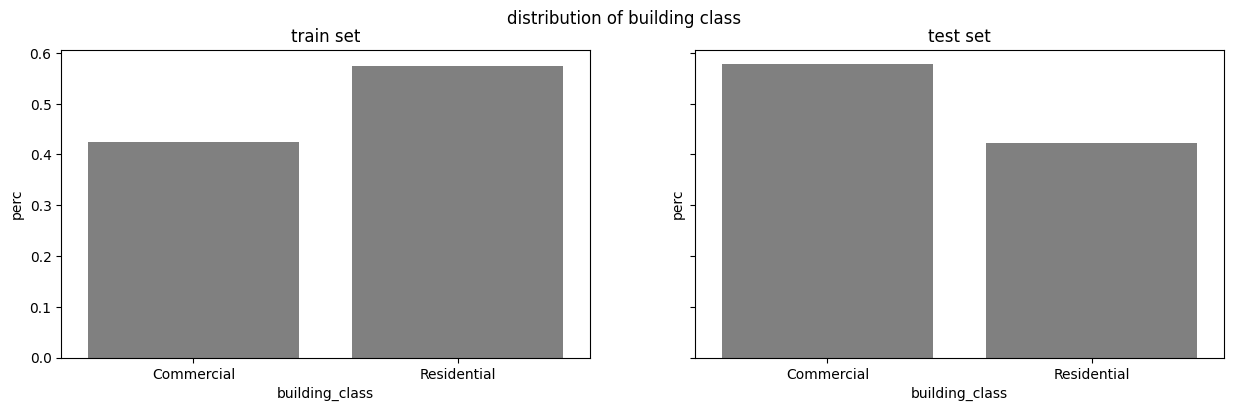

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4), sharex=True, sharey=True)
sns.barplot(data=bldg_class, x='building_class', y='perc', color='gray', ax=axs[0])
sns.barplot(data=test_bldg_class, x='building_class', y='perc', color='gray', ax=axs[1])
plt.suptitle('distribution of building class')
axs[0].set_title('train set')
axs[1].set_title('test set')
plt.show()

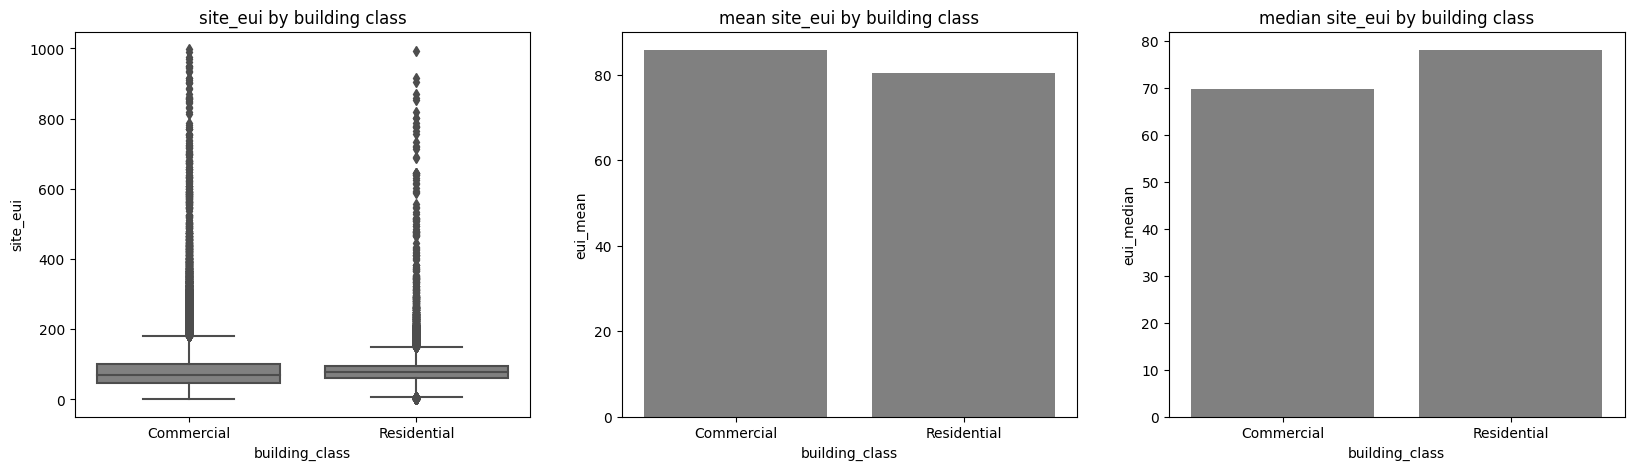

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.boxplot(data=train_df, x='building_class', y='site_eui', color='gray', ax=axs[0])
axs[0].set_title('site_eui by building class')
sns.barplot(data=bldg_class, x='building_class', y='eui_mean', color='gray', ax=axs[1])
axs[1].set_title('mean site_eui by building class')
sns.barplot(data=bldg_class, x='building_class', y='eui_median', color='gray', ax=axs[2])
axs[2].set_title('median site_eui by building class')
plt.show()

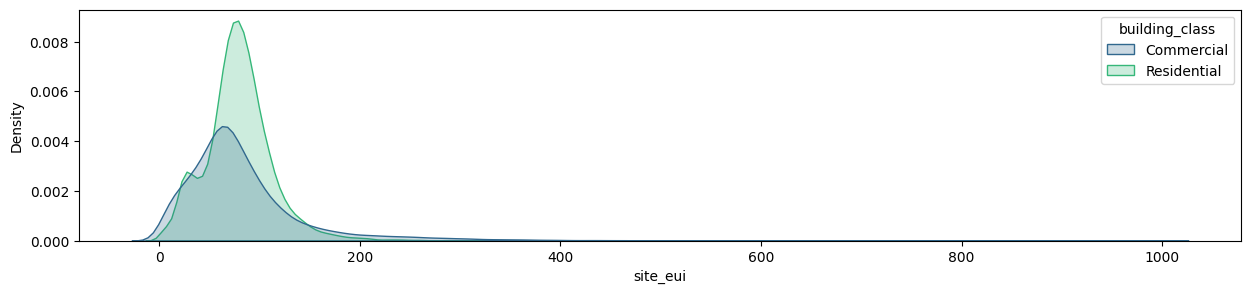

In [24]:
sns.kdeplot(data=train_df, x='site_eui', hue='building_class', palette='viridis', fill=True)
fig = plt.gcf()
fig.set_size_inches(15, 3)
plt.show()

### 4 | Facility type

- Around half of train set is of Multifamily_uncategorized facility (residential building)
- Multifamily uncategorized, Office uncategorized, Education/Other classroom, Lodging/Hotel and 2-to-4-unit building makes up ~80% of the train set
- A more diverse set of facilities make up the top 80% of the test set
- On average, Lodging/Hotel exhibits the highest eui and 2-to-4-unit building has a notably lower eui than other buildings in the top 80% of the train set
- Facilities such as grocery stores, healthcare inpatient, laboratory and data centre have a notably high eui. However these facilities account for only a small proportion of the dataset (e.g. grocery store, which is the largest group among the 4, accounts for only .6% of the train dataset)

In [25]:
fac_type = train_df.groupby(['building_class', 'facility_type']).agg(
    counts=('facility_type', 'count'), eui_mean=('site_eui', 'mean'), eui_median=('site_eui', 'median')
    ).sort_values('counts', ascending=False).reset_index()
fac_type['perc'] = fac_type.counts / fac_type.counts.sum()
fac_type['cum_perc'] = fac_type.perc.cumsum()

test_fac_type = test_df.groupby(['building_class', 'facility_type']).agg(counts=('building_class', 'count')).sort_values('counts', ascending=False).reset_index()
test_fac_type['perc'] = test_fac_type.counts / test_fac_type.counts.sum()
test_fac_type['cum_perc'] = test_fac_type.perc.cumsum()

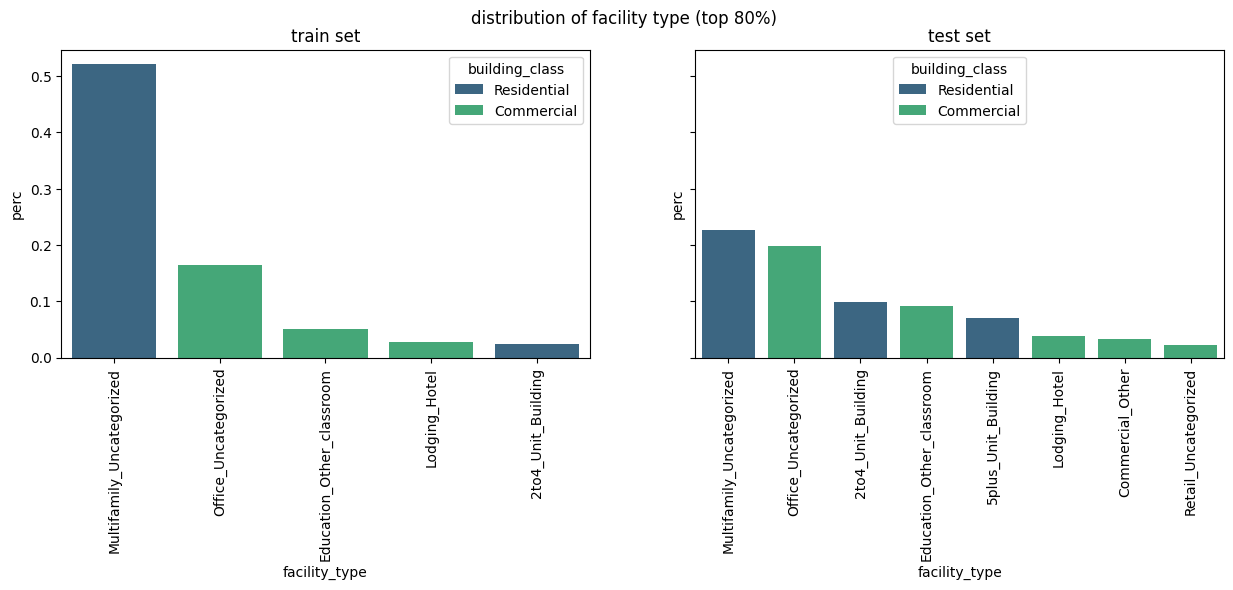

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4), sharey=True)
sns.barplot(data=fac_type[fac_type.cum_perc <= .8], x='facility_type', y='perc', palette='viridis', hue='building_class', ax=axs[0], dodge=False)
sns.barplot(data=test_fac_type[test_fac_type.cum_perc <= .8], x='facility_type', y='perc', palette='viridis', hue='building_class', ax=axs[1], dodge=False)
plt.suptitle('distribution of facility type (top 80%)')
axs[0].set_title('train set')
axs[1].set_title('test set')
axs[0].tick_params(axis='x', rotation=90)
axs[1].tick_params(axis='x', rotation=90)
plt.show()

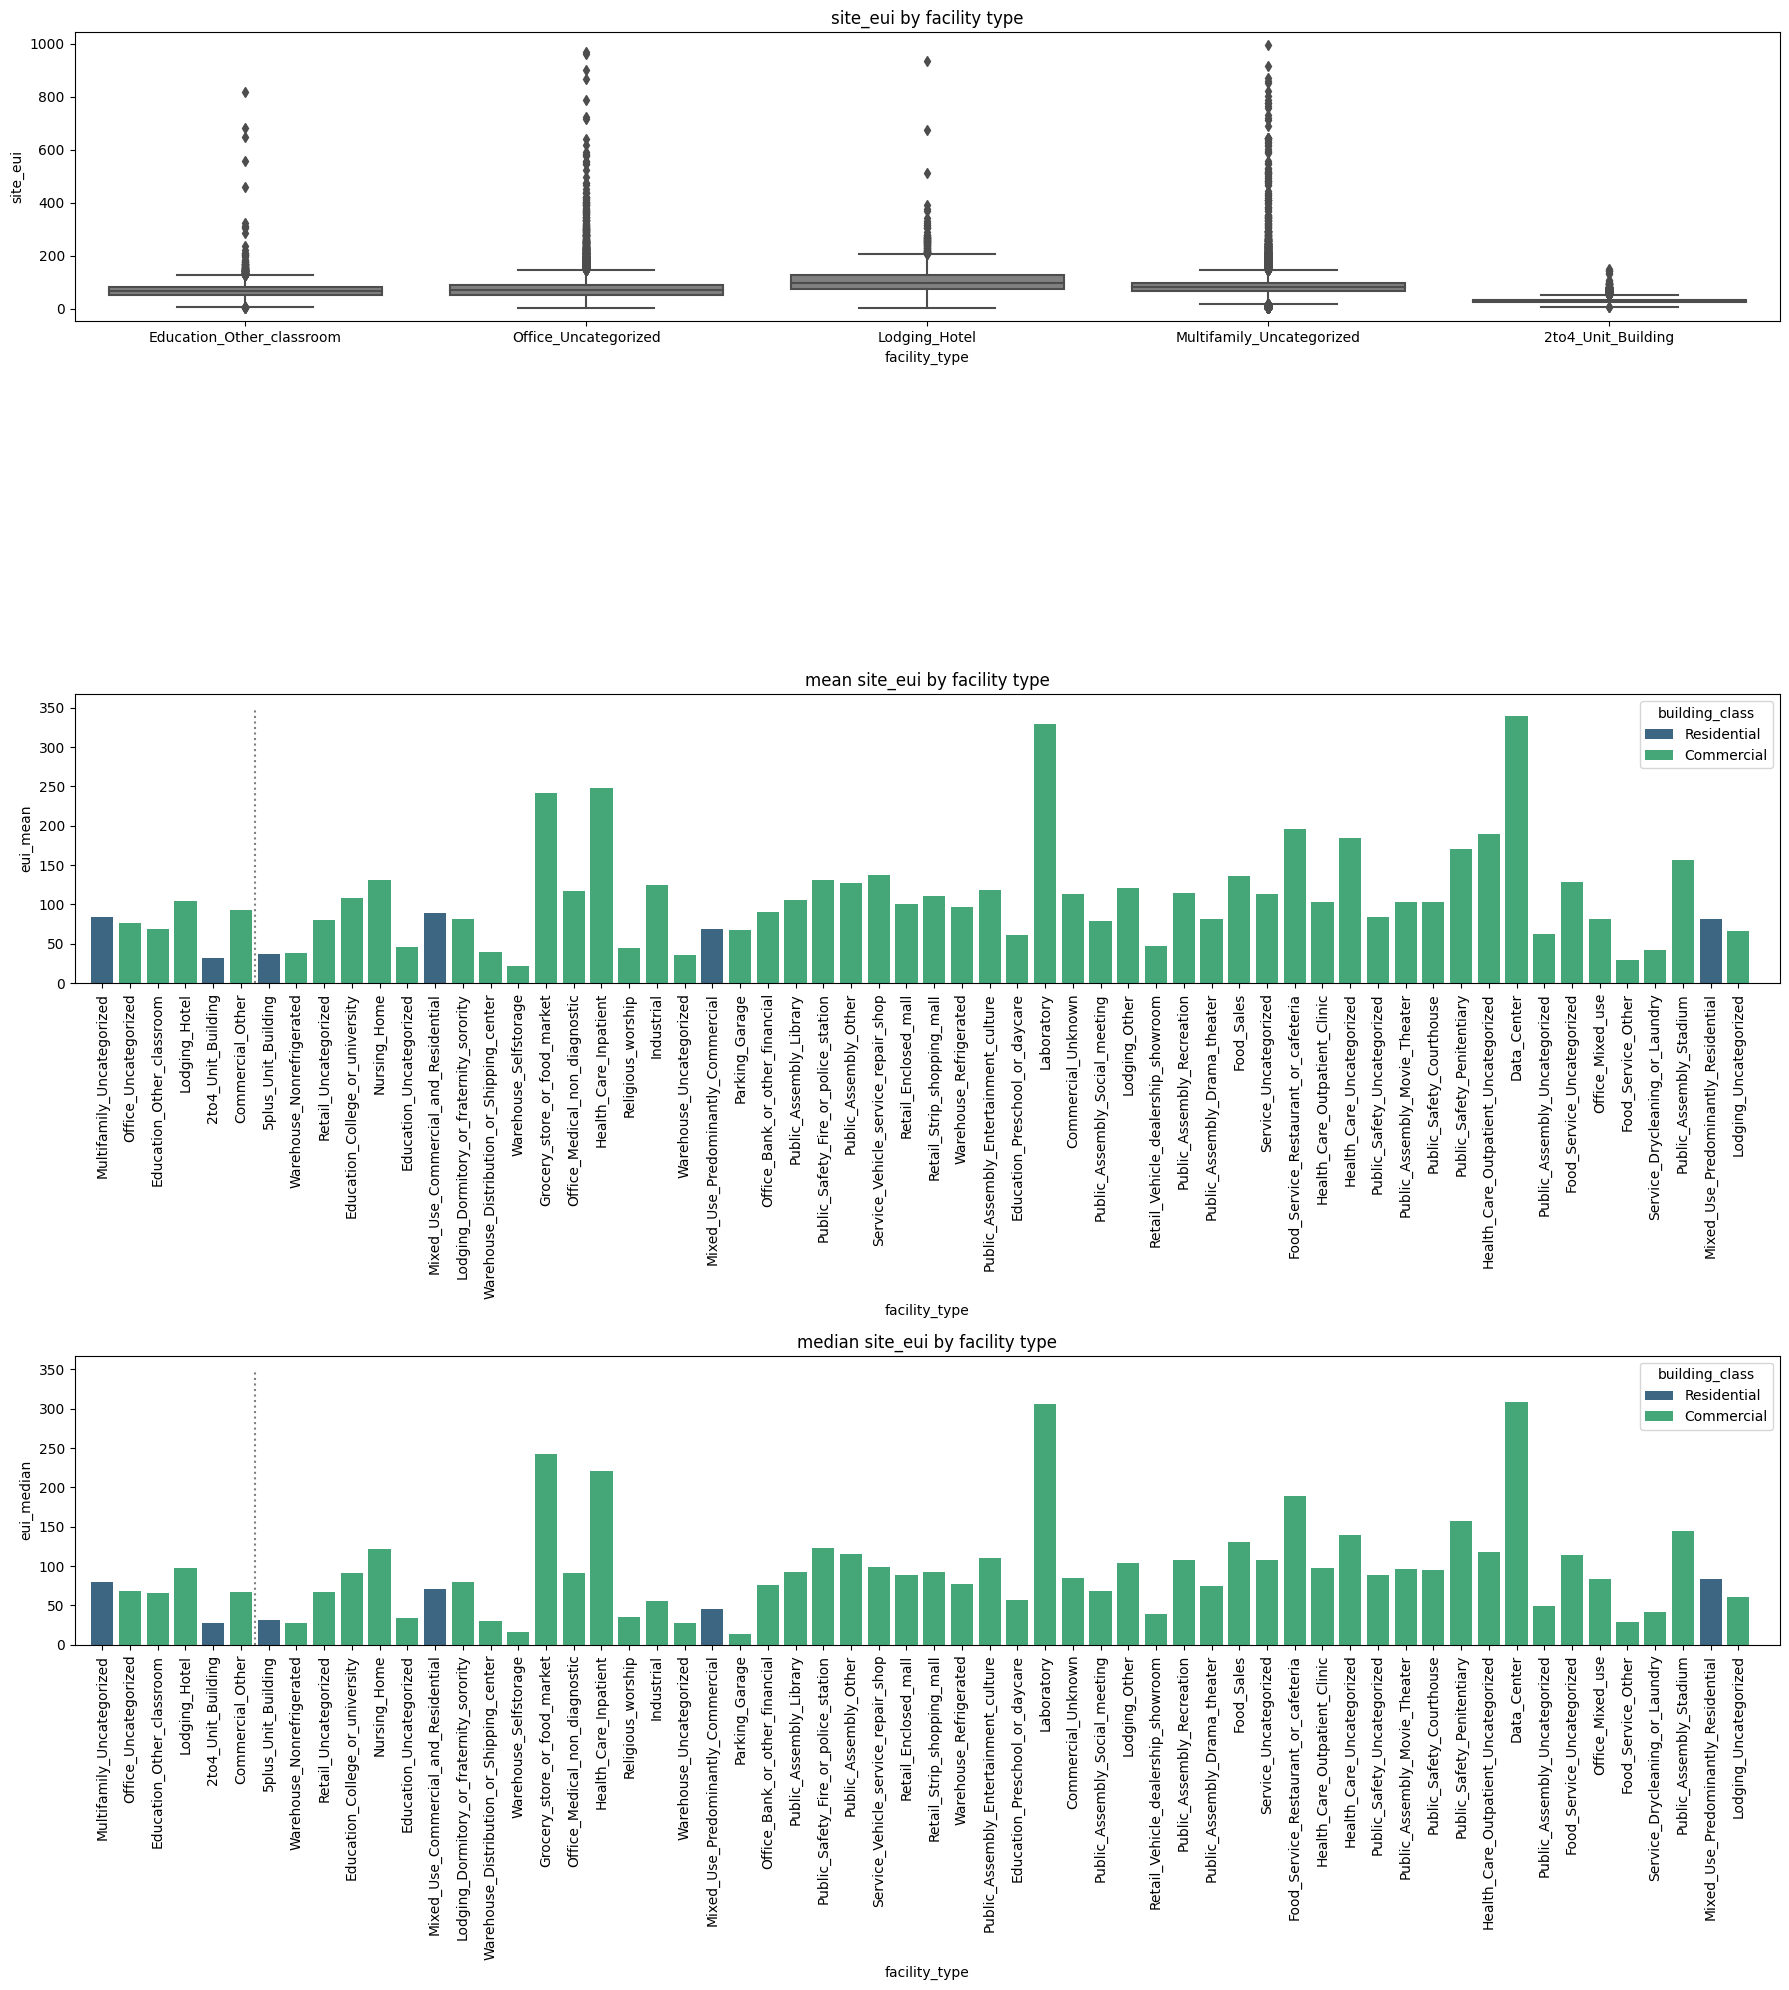

In [27]:
fig, axs = plt.subplots(3, 1, figsize=(18, 20))
sns.boxplot(data=train_df[train_df.facility_type.isin(fac_type[fac_type.cum_perc <= .8].facility_type.values)], x='facility_type', y='site_eui', color='gray', ax=axs[0])
axs[0].set_title('site_eui by facility type')

sns.barplot(data=fac_type, x='facility_type', y='eui_mean', hue='building_class', dodge=False, palette='viridis', ax=axs[1])
axs[1].set_title('mean site_eui by facility type')
axs[1].tick_params(axis='x', rotation=90)
axs[1].vlines(5.5, 0, 350, colors='gray', linestyles='dotted', label='80%')
axs[1].set_xlim(left=-1, right=len(fac_type)+.5)

sns.barplot(data=fac_type, x='facility_type', y='eui_median', hue='building_class', dodge=False, palette='viridis', ax=axs[2])
axs[2].set_title('median site_eui by facility type')
axs[2].tick_params(axis='x', rotation=90)
axs[2].vlines(5.5, 0, 350, colors='gray', linestyles='dotted', label='80%')
axs[2].set_xlim(left=-1, right=len(fac_type)+.5)

plt.tight_layout()
plt.show()

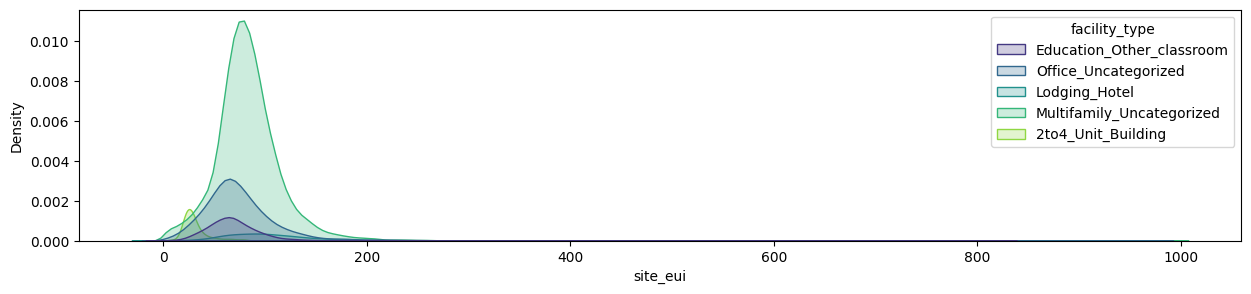

In [28]:
sns.kdeplot(
    data=train_df[train_df.facility_type.isin(fac_type[fac_type.cum_perc <= .8].facility_type.values)], 
    x='site_eui', hue='facility_type', palette='viridis', fill=True
    )
fig = plt.gcf()
fig.set_size_inches(15, 3)
plt.show()

## Numerical variables 

In [29]:
train_df.describe()

Year_Factor    floor_area    year_built  energy_star_rating  \
count  75757.000000  7.575700e+04  73920.000000        49048.000000   
mean       4.367755  1.659839e+05   1952.306764           61.048605   
std        1.471441  2.468758e+05     37.053619           28.663683   
min        1.000000  9.430000e+02      0.000000            0.000000   
25%        3.000000  6.237900e+04   1927.000000           40.000000   
50%        5.000000  9.136700e+04   1951.000000           67.000000   
75%        6.000000  1.660000e+05   1977.000000           85.000000   
max        6.000000  6.385382e+06   2015.000000          100.000000   

          ELEVATION  january_min_temp  january_avg_temp  january_max_temp  \
count  75757.000000      75757.000000      75757.000000      75757.000000   
mean      39.506323         11.432343         34.310468         59.054952   
std       60.656596          9.381027          6.996108          5.355458   
min       -6.400000        -19.000000         10.806452         42.000000   
25%       11.900000          6.000000         29.827586         56.000000   
50%       25.000000         11.000000         34.451613         59.000000   
75%       42.700000         13.000000         37.322581         62.000000   
max     1924.500000         49.000000         64.758065         91.000000   

       february_min_temp  february_avg_temp  ...  days_above_80F  \
count       75757.000000       75757.000000  ...    75757.000000   
mean           11.720567          35.526837  ...       82.709809   
std            12.577272           8.866697  ...       25.282913   
min           -13.000000          13.250000  ...        0.000000   
25%             2.000000          31.625000  ...       72.000000   
50%             9.000000          34.107143  ...       84.000000   
75%            20.000000          40.879310  ...       97.000000   
max            48.000000          65.107143  ...      260.000000   

       days_above_90F  days_above_100F  days_above_110F  \
count    75757.000000     75757.000000     75757.000000   
mean        14.058701         0.279539         0.002442   
std         10.943996         2.252323         0.142140   
min          0.000000         0.000000         0.000000   
25%          6.000000         0.000000         0.000000   
50%         12.000000         0.000000         0.000000   
75%         17.000000         0.000000         0.000000   
max        185.000000       119.000000        16.000000   

       direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
count              34675.000000               33946.000000    34675.000000   
mean                  66.552675                  62.779974        4.190601   
std                  131.147834                 130.308106        6.458789   
min                    1.000000                   1.000000        1.000000   
25%                    1.000000                   1.000000        1.000000   
50%                    1.000000                   1.000000        1.000000   
75%                    1.000000                   1.000000        1.000000   
max                  360.000000                 360.000000       23.300000   

       days_with_fog      site_eui            id  
count   29961.000000  75757.000000  75757.000000  
mean      109.142051     82.584693  37878.000000  
std        50.699751     58.255403  21869.306509  
min        12.000000      1.001169      0.000000  
25%        88.000000     54.528601  18939.000000  
50%       104.000000     75.293716  37878.000000  
75%       131.000000     97.277534  56817.000000  
max       311.000000    997.866120  75756.000000  

[8 rows x 61 columns]

In [30]:
numeric = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

train_df_num = train_df.select_dtypes(include=numeric)
train_df_num = train_df_num.drop(['id', 'Year_Factor'], axis=1)

test_df_num = test_df.select_dtypes(include=numeric)
test_df_num = test_df_num.drop(['id', 'Year_Factor'], axis=1)

/home/saori/.pyenv/versions/lewagon/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


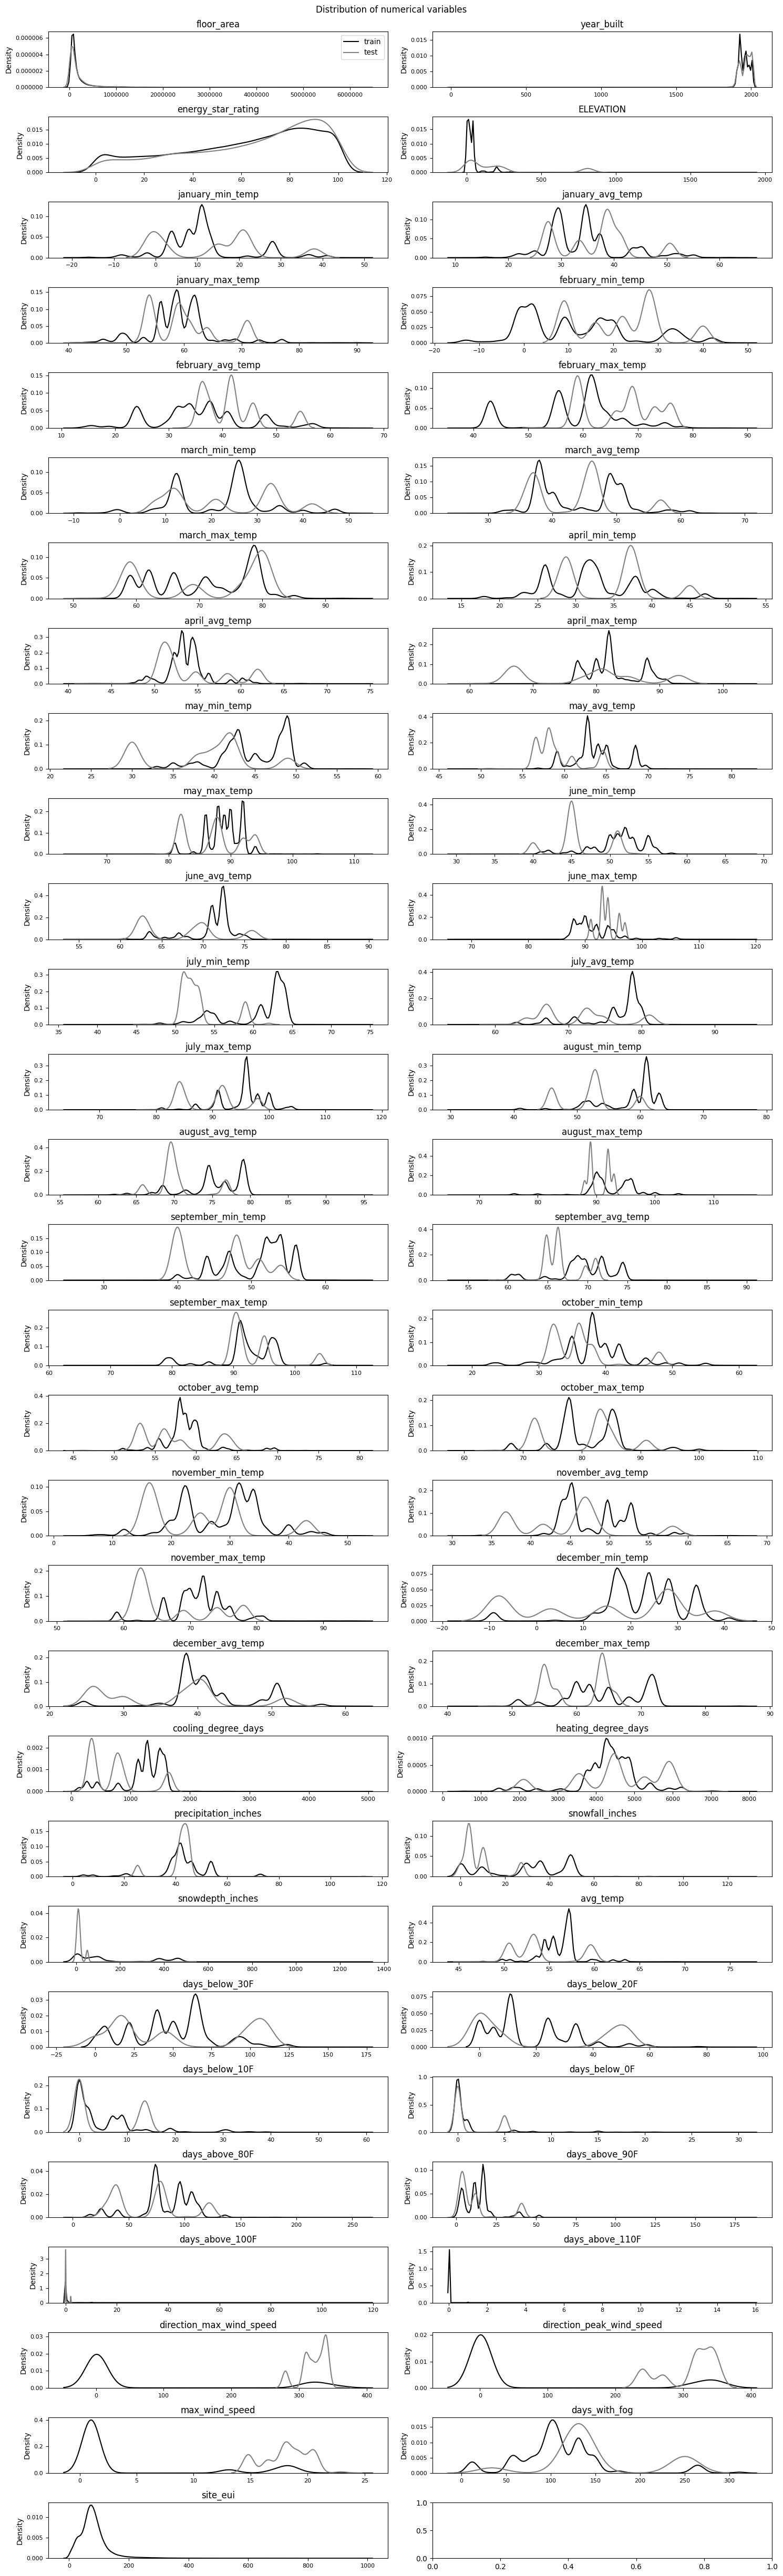

In [31]:
fig, axs = plt.subplots(len(train_df_num.columns)//2 + len(train_df_num.columns)%2, 2, figsize=(15, 50))

for i, column in enumerate(train_df_num.columns):
    sns.kdeplot(data=train_df_num, x=column, ax=axs[i//2, i%2], color='black', label='train')
    if column != 'site_eui':
        sns.kdeplot(data=test_df_num, x=column, ax=axs[i//2, i%2], color='gray', label='test')
    axs[i//2, i%2].set_title(column)
    axs[i//2, i%2].set_xlabel("")
    axs[i//2, i%2].tick_params(axis='both', labelsize=8)
    axs[i//2, i%2].ticklabel_format(axis='both', style='plain')

axs[0,0].legend()

plt.suptitle("Distribution of numerical variables")
plt.tight_layout()
plt.subplots_adjust(top=0.97)
plt.show()

### 1 | Floor area

- There is weak correlation between floor area and eui
- However this trend diminishes when only buildings with smaller floor area (< 202,000) are concerned
- 80% of buildings have floor area under 201,075
- Buildings with large floor area (> 2,000,000) are mostly commercial buildings

In [32]:
train_df.sort_values('floor_area')[:round(len(train_df) * .8)].tail(1)

Year_Factor State_Factor building_class          facility_type  \
74177            6     State_11     Commercial  Health_Care_Inpatient   

       floor_area  year_built  energy_star_rating  ELEVATION  \
74177    201075.0      2000.0                23.0       26.5   

       january_min_temp  january_avg_temp  ...  days_above_80F  \
74177                28         43.451613  ...              25   

       days_above_90F  days_above_100F  days_above_110F  \
74177               3                0                0   

       direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
74177                       NaN                        NaN             NaN   

       days_with_fog    site_eui     id  
74177            NaN  211.831519  74177  

[1 rows x 64 columns]

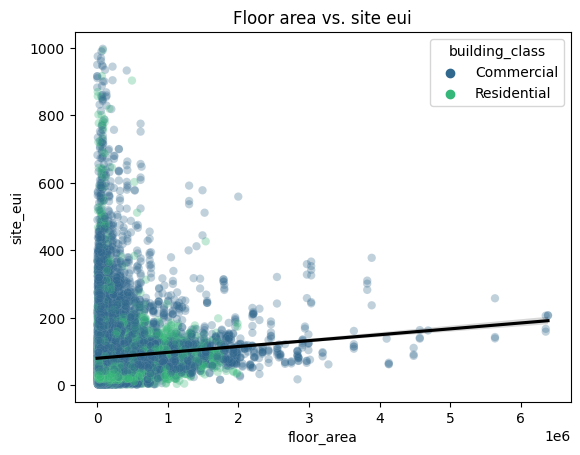

In [33]:
sns.scatterplot(
    data=train_df, x='floor_area', y='site_eui', hue='building_class', 
    palette='viridis',
    alpha=.3,
    linewidth=.1,
    )
sns.regplot(
    data=train_df, x='floor_area', y='site_eui', 
    scatter=False,
    line_kws={'color':'black'},
    )

plt.title("Floor area vs. site eui")
plt.show()

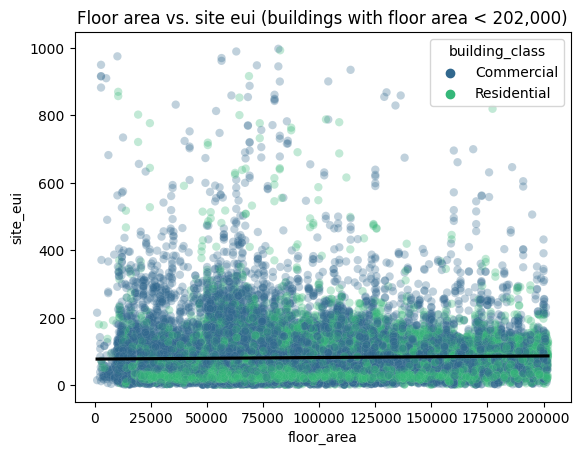

In [34]:
sns.scatterplot(
    data=train_df[train_df.floor_area < 202000], x='floor_area', y='site_eui', hue='building_class', 
    palette='viridis',
    alpha=.3,
    linewidth=.1,
    )
sns.regplot(
    data=train_df[train_df.floor_area < 202000], x='floor_area', y='site_eui', 
    scatter=False,
    line_kws={'color':'black'},
    )
plt.title('Floor area vs. site eui (buildings with floor area < 202,000)')
plt.show()

### 2 | Year built

- 6 buildings in train set and 1 building in test set contain value 0, which will be corrected as `NaN` 
- There doesn't seem to be an apparent overall relationship between `year_built` and `site_eui` 
- However, in newer building (e.g. buildings built in roughly last 50 years), there seems to be a negative relationship (newer buildings tend to have lower eui)

In [35]:
train_df.sort_values('year_built').head(10)

Year_Factor State_Factor building_class         facility_type  \
955              2      State_1     Commercial         Lodging_Hotel   
5571             6      State_1     Commercial         Lodging_Hotel   
353              1      State_1     Commercial         Lodging_Hotel   
4535             5      State_1     Commercial         Lodging_Hotel   
2159             3      State_1     Commercial         Lodging_Hotel   
3415             4      State_1     Commercial         Lodging_Hotel   
44951            5      State_6     Commercial  Office_Uncategorized   
15123            1      State_6     Commercial  Office_Uncategorized   
19948            2      State_6     Commercial  Office_Uncategorized   
26876            3      State_6     Commercial  Office_Uncategorized   

       floor_area  year_built  energy_star_rating  ELEVATION  \
955      204392.0         0.0                63.0        2.4   
5571     204392.0         0.0                78.0       45.7   
353      204392.0         0.0                61.0       59.1   
4535     204392.0         0.0                76.0        9.1   
2159     204392.0         0.0                63.0        9.1   
3415     204392.0         0.0                68.0        9.1   
44951    276000.0      1600.0                81.0       42.7   
15123    276000.0      1600.0                87.0       42.7   
19948    276000.0      1600.0                88.0       42.7   
26876    276000.0      1600.0                79.0       25.6   

       january_min_temp  january_avg_temp  ...  days_above_80F  \
955                  27         48.951613  ...             113   
5571                 37         52.693548  ...              16   
353                  36         50.500000  ...              14   
4535                 29         51.387097  ...             136   
2159                 22         44.790323  ...              72   
3415                 41         55.096774  ...              27   
44951                 8         29.854839  ...             106   
15123                 6         29.677419  ...              84   
19948                13         37.322581  ...              72   
26876                11         35.080645  ...              75   

       days_above_90F  days_above_100F  days_above_110F  \
955                35                1                0   
5571                2                0                0   
353                 0                0                0   
4535               52               10                0   
2159               10                0                0   
3415                6                0                0   
44951              12                0                0   
15123              16                1                0   
19948              17                0                0   
26876              11                0                0   

       direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
955                         1.0                        1.0             1.0   
5571                        NaN                        NaN             NaN   
353                         NaN                        NaN             NaN   
4535                        NaN                        NaN             NaN   
2159                        NaN                        NaN             NaN   
3415                        NaN                        NaN             NaN   
44951                     310.0                      310.0            13.0   
15123                       1.0                        1.0             1.0   
19948                       1.0                        1.0             1.0   
26876                       1.0                        1.0             1.0   

       days_with_fog   site_eui     id  
955             88.0  87.526794    955  
5571             NaN  60.833333   5571  
353              NaN  82.627179    353  
4535             NaN  59.503653   4535  
2159             NaN  75.362740   2159  
3415             NaN  61.79

In [36]:
test_df.sort_values('year_built').head(5)

Year_Factor State_Factor building_class  \
7050            7      State_1     Commercial   
7381            7      State_8     Commercial   
7252            7      State_2     Commercial   
6957            7      State_8     Commercial   
5532            7      State_2     Commercial   

                        facility_type  floor_area  year_built  \
7050                    Lodging_Hotel    204392.0         0.0   
7381            Health_Care_Inpatient    873226.0      1756.0   
7252  Education_College_or_university   5634890.0      1789.0   
6957        Warehouse_Nonrefrigerated    100000.0      1800.0   
5532        Education_Other_classroom     99984.0      1800.0   

      energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  ...  \
7050                78.0       18.6                38         50.596774  ...   
7381                32.0      130.8                 2         33.435484  ...   
7252                 NaN       15.2                15         41.177419  ...   
6957                 NaN      135.0                 2         33.435484  ...   
5532                 NaN       30.5                15         41.177419  ...   

      days_below_0F  days_above_80F  days_above_90F  days_above_100F  \
7050              0              29               5                2   
7381              0              77               5                0   
7252              0             122              41                0   
6957              0              77               5                0   
5532              0             122              41                0   

      days_above_110F  direction_max_wind_speed  direction_peak_wind_speed  \
7050                0                       NaN                        NaN   
7381                0                       NaN                        NaN   
7252                0                       NaN                        NaN   
6957                0                       NaN                        NaN   
5532                0                       NaN                        NaN   

      max_wind_speed  days_with_fog     id  
7050             NaN            NaN  82807  
7381             NaN            NaN  83138  
7252             NaN            NaN  83009  
6957             NaN            NaN  82714  
5532             NaN            NaN  81289  

[5 rows x 63 columns]

In [37]:
# replacing 0 with NaN
train_df['year_built'] = train_df.year_built.replace(0.0, np.nan)
test_df['year_built'] = test_df.year_built.replace(0.0, np.nan)

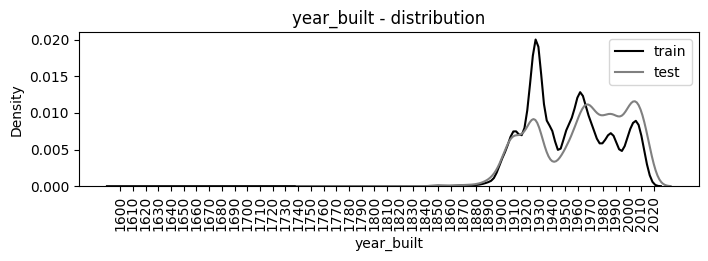

In [38]:
# plotting distribution again
sns.kdeplot(data=train_df, x='year_built', color='black', label='train')
sns.kdeplot(data=test_df, x='year_built', color='gray', label='test')
plt.title('year_built - distribution')
plt.xticks(np.arange(1600, 2022, 10), rotation=90)
fig = plt.gcf()
fig.set_size_inches(8,2)
plt.legend()
plt.show()

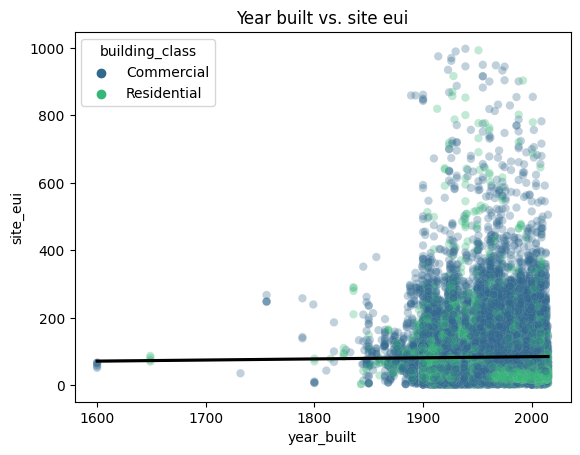

In [39]:
sns.scatterplot(
    data=train_df, x='year_built', y='site_eui', hue='building_class', 
    palette='viridis',
    alpha=.3,
    linewidth=.1,
    )
sns.regplot(
    data=train_df, x='year_built', y='site_eui', 
    scatter=False,
    line_kws={'color':'black'},
    )

plt.title("Year built vs. site eui")
plt.show()

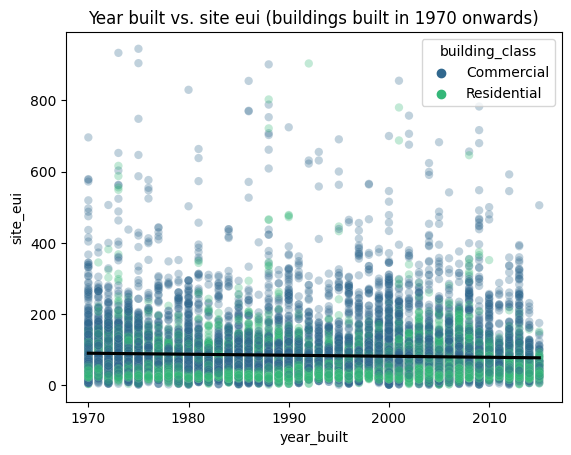

In [40]:
years_after = 1970

sns.scatterplot(
    data=train_df[train_df.year_built >= years_after], x='year_built', y='site_eui', hue='building_class', 
    palette='viridis',
    alpha=.3,
    linewidth=.1,
    )
sns.regplot(
    data=train_df[train_df.year_built >= years_after], x='year_built', y='site_eui', 
    scatter=False,
    line_kws={'color':'black'},
    )

plt.title(f"Year built vs. site eui (buildings built in {years_after} onwards)")
plt.show()

### 3 | Energy star rating 

- Newer buildings tend to have lower energy star rating. However, in the last 30 years the trend reversed
- There is a clear relationship between energy star rating and site eui - buildings with higher energy star rating tend to have lower site eui.
- Commercial buildings seem to have higher site eui compared to residential buildings with the same energy star rating

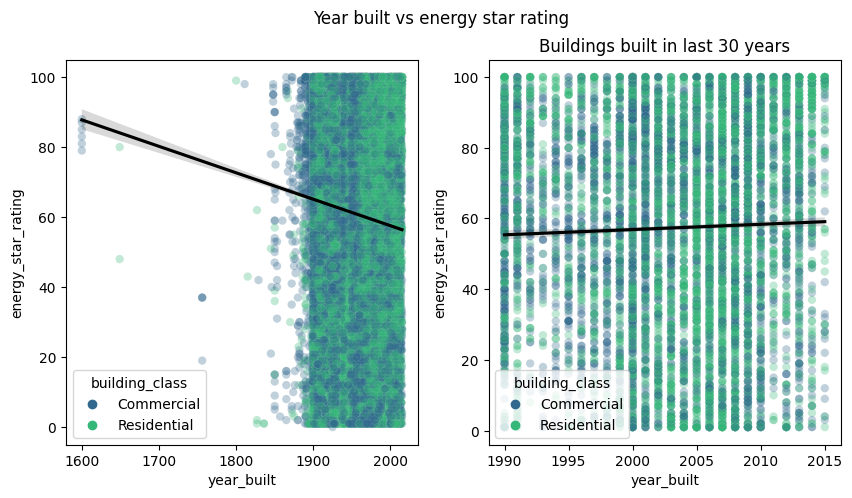

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

sns.scatterplot(
    data=train_df, x='year_built', y='energy_star_rating', 
    hue='building_class', palette='viridis',
    alpha=.3,
    linewidth=.1,
    ax=axs[0]
    )
sns.regplot(
    data=train_df, x='year_built', y='energy_star_rating', 
    scatter=False,
    line_kws={'color':'black'},
    ax=axs[0]
    )
axs[1].set_title("All buildings")

sns.scatterplot(
    data=train_df[train_df.year_built >= 1990], x='year_built', y='energy_star_rating', 
    hue='building_class', palette='viridis',
    alpha=.3,
    linewidth=.1,
    ax=axs[1]
    )
sns.regplot(
    data=train_df[train_df.year_built >= 1990], x='year_built', y='energy_star_rating', 
    scatter=False,
    line_kws={'color':'black'},
    ax=axs[1]
    )
axs[1].set_title("Buildings built in last 30 years")
plt.suptitle("Year built vs energy star rating")
plt.show()

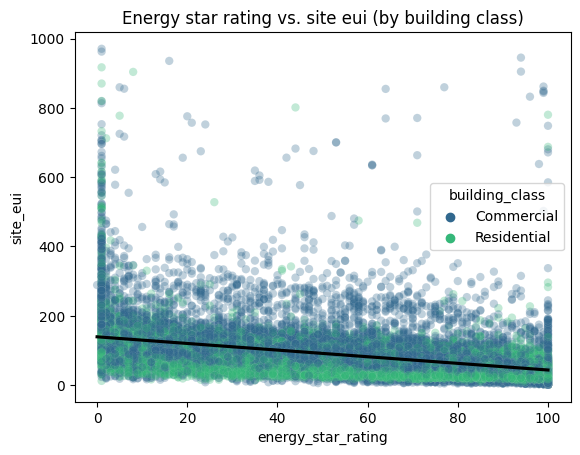

In [42]:
sns.scatterplot(
    data=train_df, x='energy_star_rating', y='site_eui', hue='building_class', 
    palette='viridis',
    alpha=.3,
    linewidth=.1,
    )
sns.regplot(
    data=train_df, x='energy_star_rating', y='site_eui', 
    scatter=False,
    line_kws={'color':'black'},
    )

plt.title("Energy star rating vs. site eui (by building class)")
plt.show()

### 4 | ELEVATION 

- Buildings on higher elevation tend to have higher eui

Text(0.5, 1.0, 'Elevation vs eui')

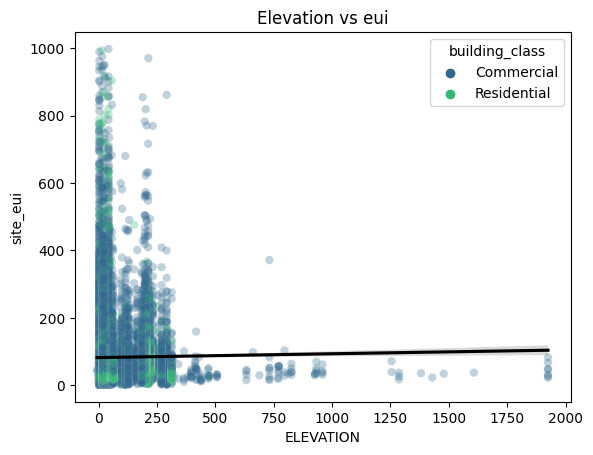

In [43]:
sns.scatterplot(
    data=train_df, x='ELEVATION', y='site_eui', 
    hue='building_class', palette='viridis',
    alpha=.3,
    linewidth=.1,
    )
sns.regplot(
    data=train_df, x='ELEVATION', y='site_eui', 
    scatter=False,
    line_kws={'color':'black'},
    )
plt.title("Elevation vs eui")


## Environmental variables by state

- State 4 seems to have a peak at a higher elevation than other states
- State 1 and 11 appear to have smaller fluctuation in average temperature throughout the year compare to other states
- State 4 has relatively lower minimum temperature throughout the year

### 1 | Elevation

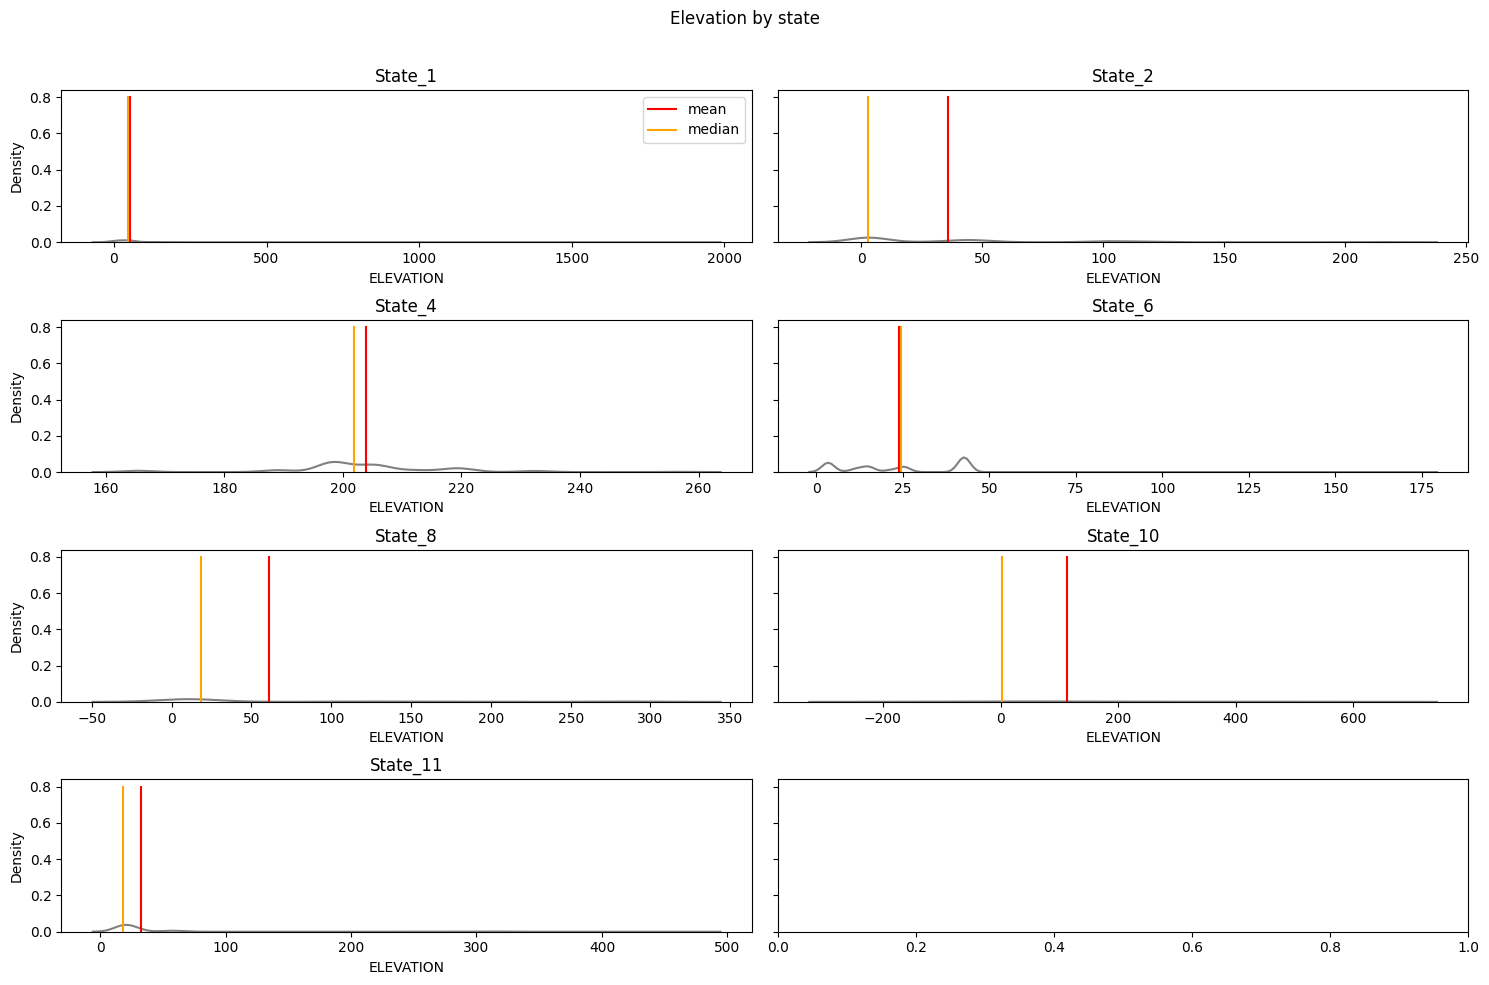

In [45]:
fig, axs = plt.subplots(4, 2, figsize=(15,10), sharey=True)
plt.suptitle('Elevation by state')

for i, state in enumerate(train_df.State_Factor.unique()):
    sns.kdeplot(
        data=train_df[train_df.State_Factor == state], x='ELEVATION',
        color='gray',
        ax=axs[i//2, i%2]
    )
    axs[i//2, i%2].plot(
        [np.mean(train_df[train_df.State_Factor == state].ELEVATION)]*2,
        [0, .8],
        color='red',
        label='mean',
    )
    axs[i//2, i%2].plot(
        [np.median(train_df[train_df.State_Factor == state].ELEVATION)]*2,
        [0, .8],
        color='orange',
        label='median',
    )
    axs[i//2, i%2].set_title(state)

axs[0,0].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

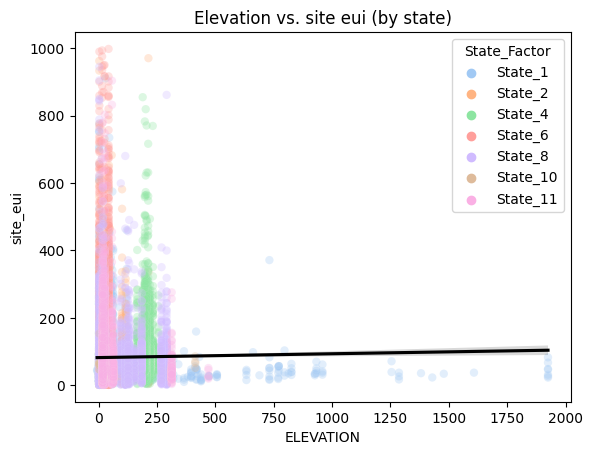

In [46]:
sns.scatterplot(
    data=train_df, x='ELEVATION', y='site_eui', hue='State_Factor', 
    palette='pastel',
    alpha=.3,
    linewidth=.1,
    )
sns.regplot(
    data=train_df, x='ELEVATION', y='site_eui', 
    scatter=False,
    line_kws={'color':'black'},
    )

plt.title("Elevation vs. site eui (by state)")
plt.show()

### 2 | Average temperature

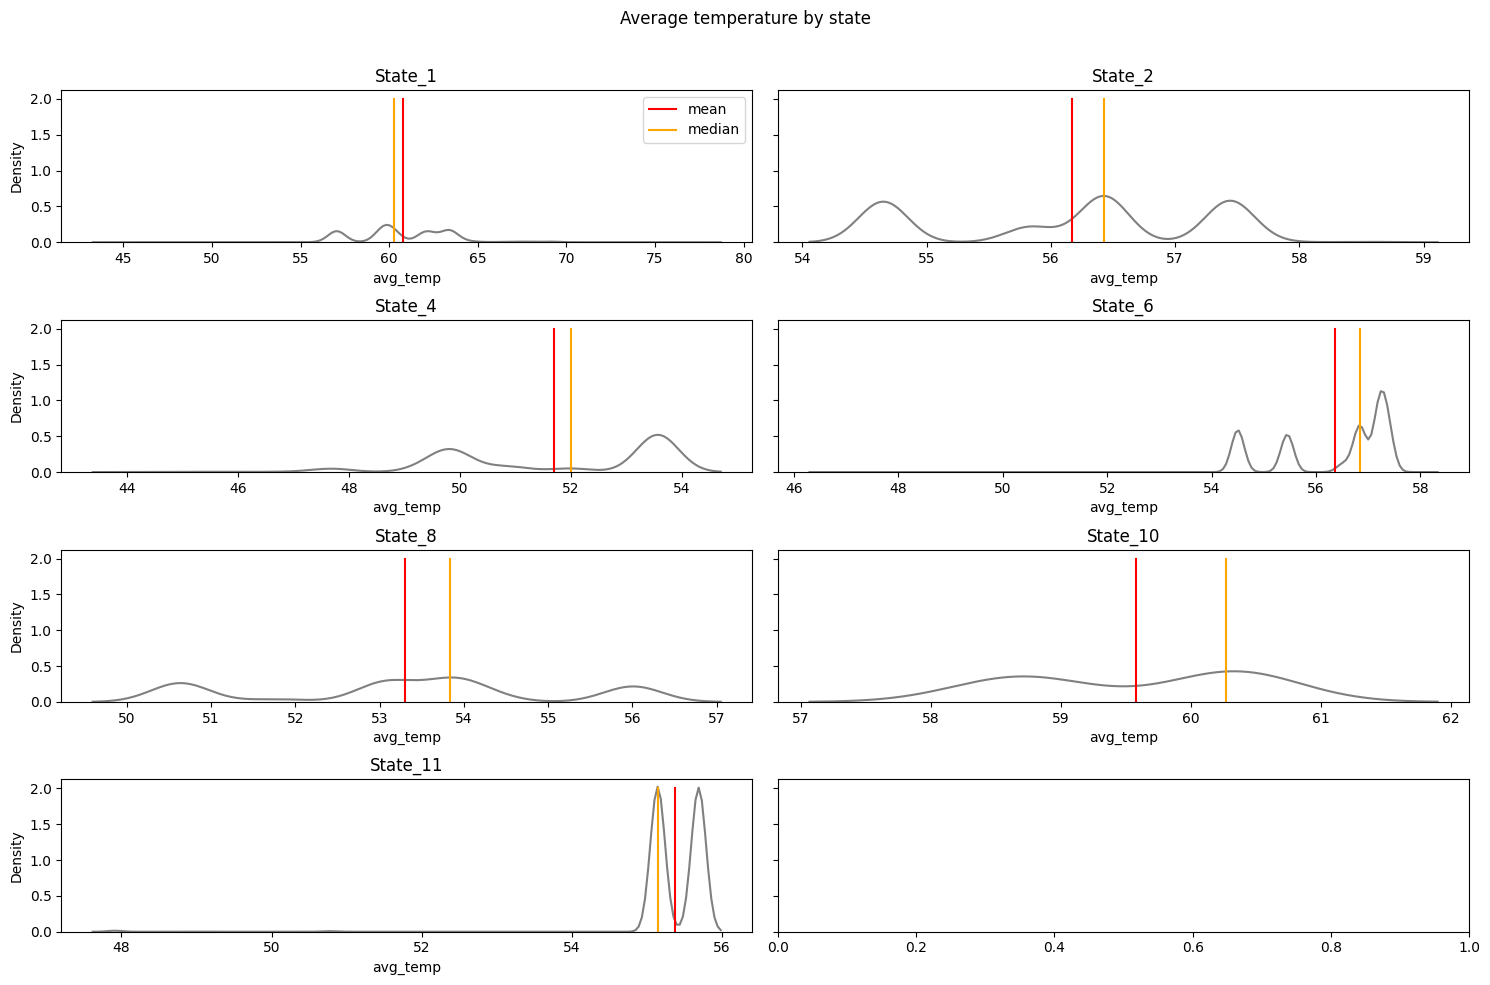

In [47]:
fig, axs = plt.subplots(4, 2, figsize=(15,10), sharey=True)
plt.suptitle('Average temperature by state')

for i, state in enumerate(train_df.State_Factor.unique()):
    sns.kdeplot(
        data=train_df[train_df.State_Factor == state], x='avg_temp',
        color='gray',
        ax=axs[i//2, i%2]
    )
    axs[i//2, i%2].plot(
        [np.mean(train_df[train_df.State_Factor == state].avg_temp)]*2,
        [0, 2],
        color='red',
        label='mean',
    )
    axs[i//2, i%2].plot(
        [np.median(train_df[train_df.State_Factor == state].avg_temp)]*2,
        [0, 2],
        color='orange',
        label='median',
    )
    axs[i//2, i%2].set_title(state)

axs[0,0].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

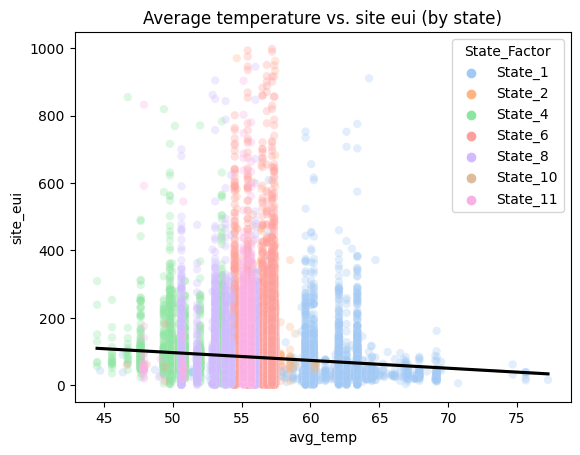

In [48]:
sns.scatterplot(
    data=train_df, x='avg_temp', y='site_eui', hue='State_Factor', 
    palette='pastel',
    alpha=.3,
    linewidth=.1,
    )
sns.regplot(
    data=train_df, x='avg_temp', y='site_eui', 
    scatter=False,
    line_kws={'color':'black'},
    )

plt.title("Average temperature vs. site eui (by state)")
plt.show()

In [49]:
min_temps = dict(zip([column for column in train_df.columns if "min_temp" in column], ["mean"]*12))
max_temps = dict(zip([column for column in train_df.columns if "max_temp" in column], ["mean"]*12))
avg_temps = dict(zip([column for column in train_df.columns if "avg_temp" in column], ["mean"]*12))


In [50]:
min_temps_df = train_df.groupby('State_Factor').agg(min_temps).T.reset_index()
max_temps_df = train_df.groupby('State_Factor').agg(max_temps).T.reset_index()
avg_temps_df = train_df.groupby('State_Factor').agg(avg_temps).T.reset_index()

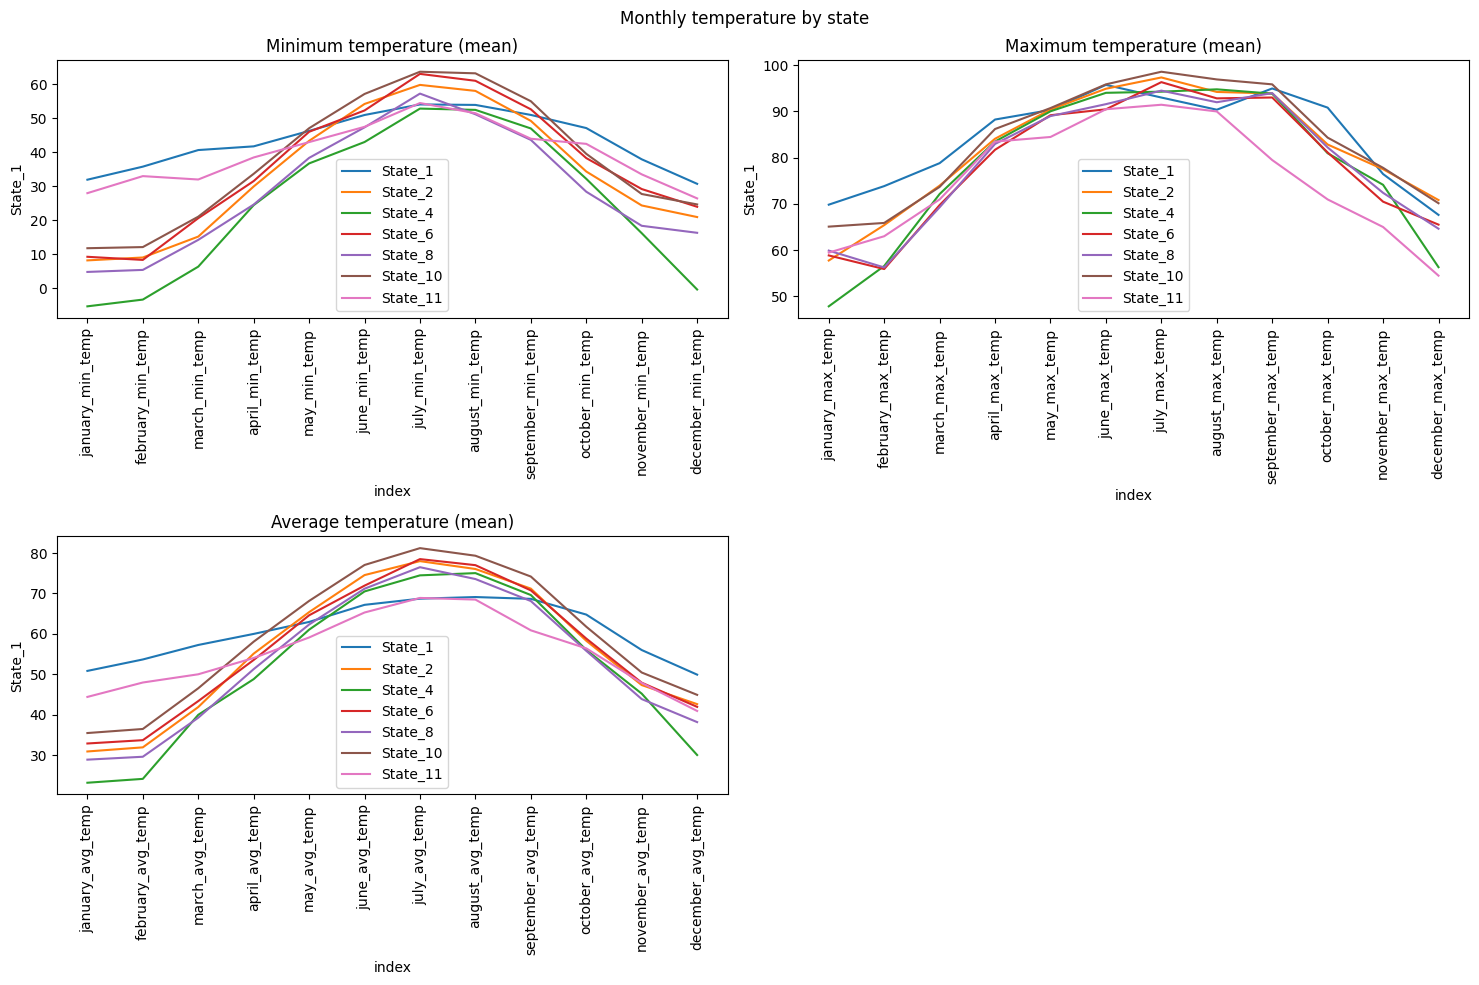

In [58]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))

for state in train_df.State_Factor.unique():
    sns.lineplot(data=min_temps_df, x='index', y=state, label=state, ax=axs[0,0])
    sns.lineplot(data=max_temps_df, x='index', y=state, label=state, ax=axs[0,1])
    sns.lineplot(data=avg_temps_df, x='index', y=state, label=state, ax=axs[1,0])

axs[0,0].tick_params(axis="x", rotation=90)
axs[0,0].legend()
axs[0,0].set_title('Minimum temperature (mean)')

axs[0,1].tick_params(axis="x", rotation=90)
axs[0,1].legend()
axs[0,1].set_title('Maximum temperature (mean)')

axs[1,0].tick_params(axis="x", rotation=90)
axs[1,0].legend()
axs[1,0].set_title('Average temperature (mean)')

plt.suptitle('Monthly temperature by state')
plt.tight_layout()
plt.subplots_adjust(top=.93)

fig.delaxes(axs[1,1])

### 3 | Temperature - days above/below X degrees

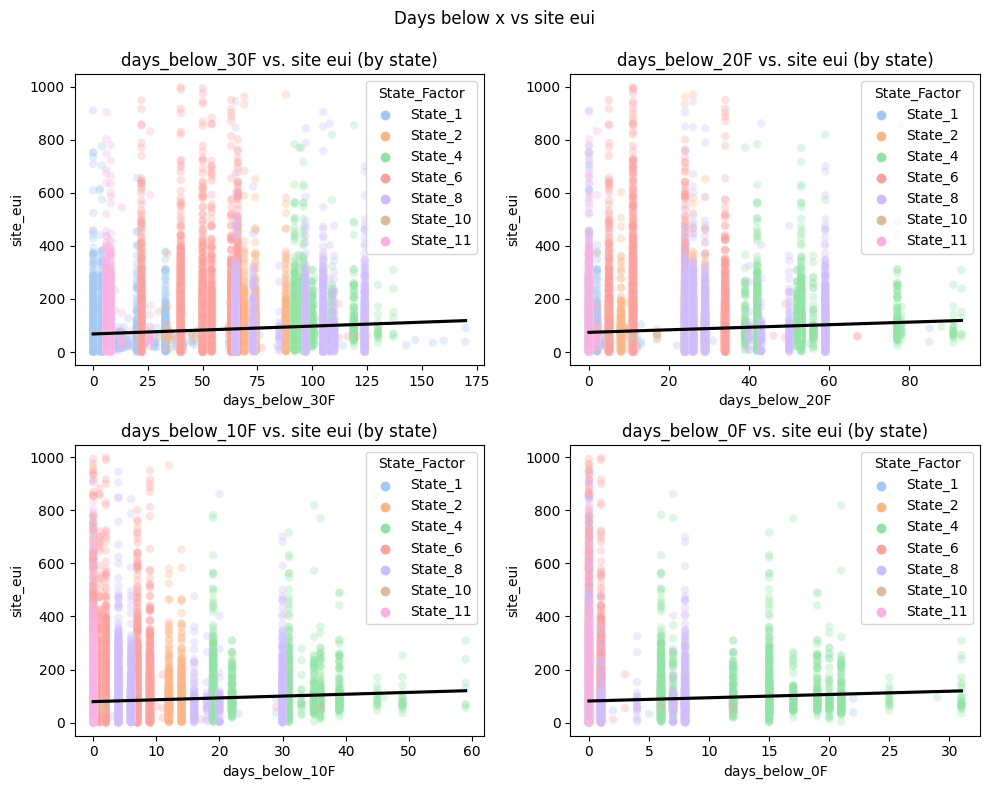

In [ ]:
# 30F = -1.1C, 20F = -6.7C, 10F = -12.2C, 0F = -17.8C
days_below = [column for column in train_df.columns if "days_below" in column]
fig, axs = plt.subplots(len(days_below)//2 + len(days_below)%2, 2, figsize=(10,8))
for i, column in enumerate(days_below):
    sns.scatterplot(
        data=train_df, x=column, y='site_eui', hue='State_Factor', 
        palette='pastel',
        alpha=.3,
        linewidth=.1,
        ax=axs[i//2, i%2],
        )
    sns.regplot(
        data=train_df, x=column, y='site_eui', 
        scatter=False,
        line_kws={'color':'black'},
        ax=axs[i//2, i%2],
        )
    axs[i//2, i%2].set_title(f"{column} vs. site eui (by state)")
plt.suptitle("Days below x vs site eui")

plt.tight_layout()
plt.subplots_adjust(top=.9)
plt.show()

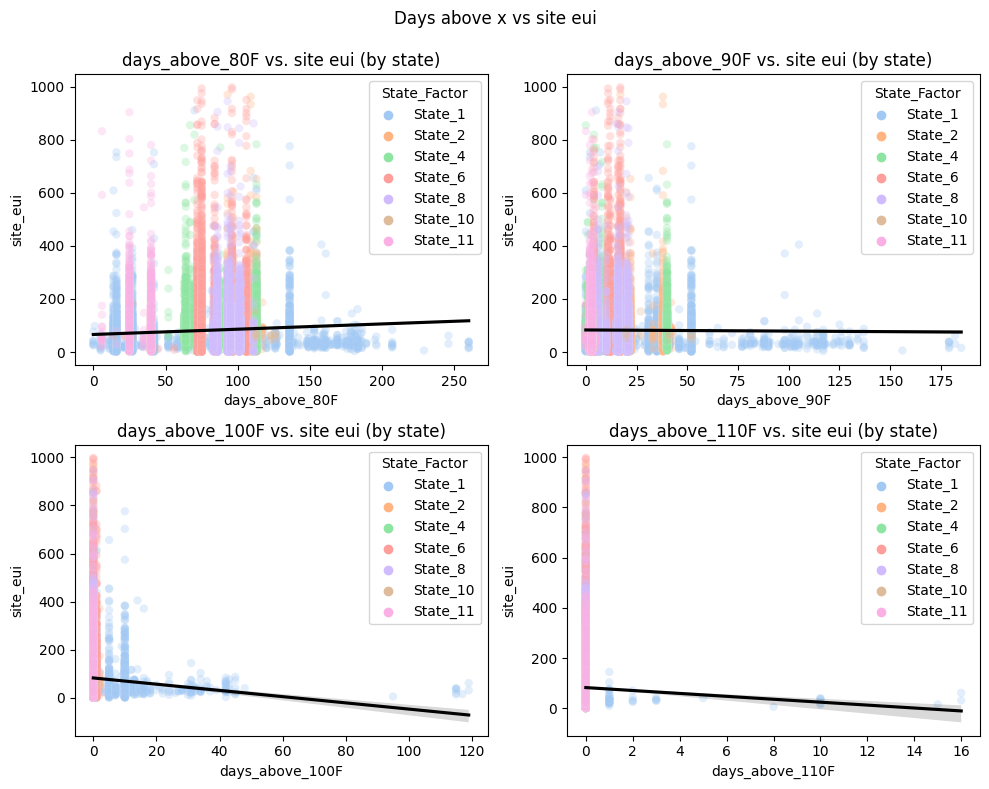

In [ ]:
# 80F = 26.7C, 90F = 32.2C, 100F = 37.8C, 110F = 43.3C
days_above = [column for column in train_df.columns if "days_above" in column]
fig, axs = plt.subplots(len(days_above)//2 + len(days_above)%2, 2, figsize=(10,8))
for i, column in enumerate(days_above):
    sns.scatterplot(
        data=train_df, x=column, y='site_eui', hue='State_Factor', 
        palette='pastel',
        alpha=.3,
        linewidth=.1,
        ax=axs[i//2, i%2],
        )
    sns.regplot(
        data=train_df, x=column, y='site_eui', 
        scatter=False,
        line_kws={'color':'black'},
        ax=axs[i//2, i%2],
        )
    axs[i//2, i%2].set_title(f"{column} vs. site eui (by state)")
plt.suptitle("Days above x vs site eui")

plt.tight_layout()
plt.subplots_adjust(top=.9)
plt.show()

### 4 | Cooling / Heating days

- State 4 tends to have higher number of heating days_above
- Buildings which have higher number of cooling days mostly belong to State 1

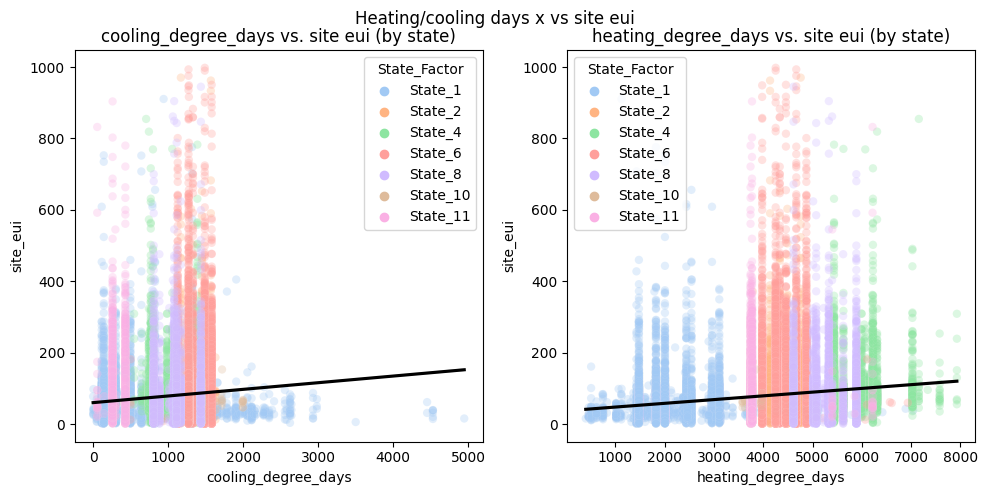

In [62]:
ac_days = [column for column in train_df.columns if "ing_degree_days" in column]
fig, axs = plt.subplots(1, 2, figsize=(10,5))
for i, column in enumerate(ac_days):
    sns.scatterplot(
        data=train_df, x=column, y='site_eui', hue='State_Factor', 
        palette='pastel',
        alpha=.3,
        linewidth=.1,
        ax=axs[i],
        )
    sns.regplot(
        data=train_df, x=column, y='site_eui', 
        scatter=False,
        line_kws={'color':'black'},
        ax=axs[i],
        )
    axs[i].set_title(f"{column} vs. site eui (by state)")
plt.suptitle("Heating/cooling days x vs site eui")

plt.tight_layout()
plt.subplots_adjust(top=.9)
plt.show()

### 5 | Snowfall

In [128]:
snowfall_cols = [column for column in train_df.columns if 'snow' in column]

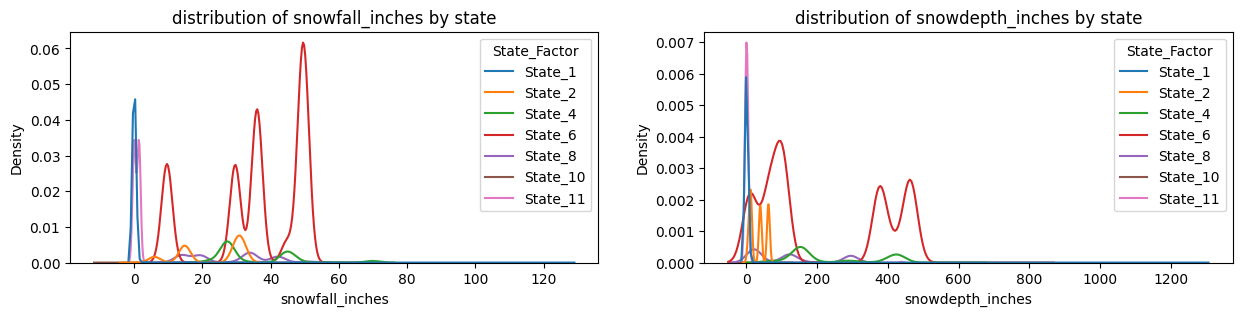

In [129]:
fig, axs = plt.subplots(1, 2, figsize=(15,3))

for i, column in enumerate(snowfall_cols):
    sns.kdeplot(data=train_df, x=column, hue='State_Factor', ax=axs[i])
    axs[i].set_title(f'distribution of {column} by state')

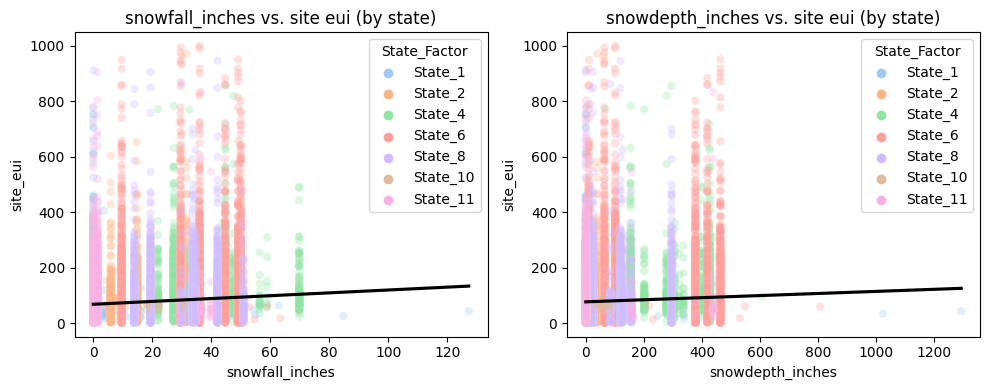

In [130]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
for i, column in enumerate(snowfall_cols):
    sns.scatterplot(
        data=train_df, x=column, y='site_eui', hue='State_Factor', 
        palette='pastel',
        alpha=.3,
        linewidth=.1,
        ax=axs[i],
        )
    sns.regplot(
        data=train_df, x=column, y='site_eui', 
        scatter=False,
        line_kws={'color':'black'},
        ax=axs[i],
        )
    axs[i].set_title(f"{column} vs. site eui (by state)")

plt.tight_layout()
plt.show()

### 6 | Precipitation

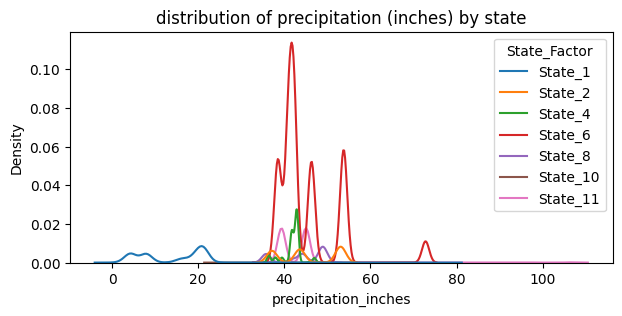

In [135]:
sns.kdeplot(data=train_df, x='precipitation_inches', hue='State_Factor')
plt.title(f'distribution of precipitation (inches) by state')
fig = plt.gcf()
fig.set_size_inches(7,3)

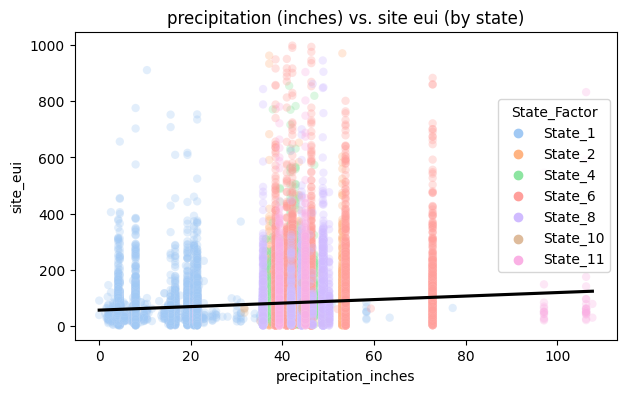

In [137]:
sns.scatterplot(
    data=train_df, x='precipitation_inches', y='site_eui', hue='State_Factor', 
    palette='pastel',
    alpha=.3,
    linewidth=.1,
    )
sns.regplot(
    data=train_df, x='precipitation_inches', y='site_eui', 
    scatter=False,
    line_kws={'color':'black'},
    )
plt.title(f"precipitation (inches) vs. site eui (by state)")

fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.show()

### 7 | Wind

In [138]:
wind_cols = [column for column in train_df.columns if 'wind' in column]

In [140]:
wind_cols

['direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed']

/home/saori/.pyenv/versions/lewagon/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/saori/.pyenv/versions/lewagon/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/saori/.pyenv/versions/lewagon/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/saori/.pyenv/versions/lewagon/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/saori/.pyenv/v

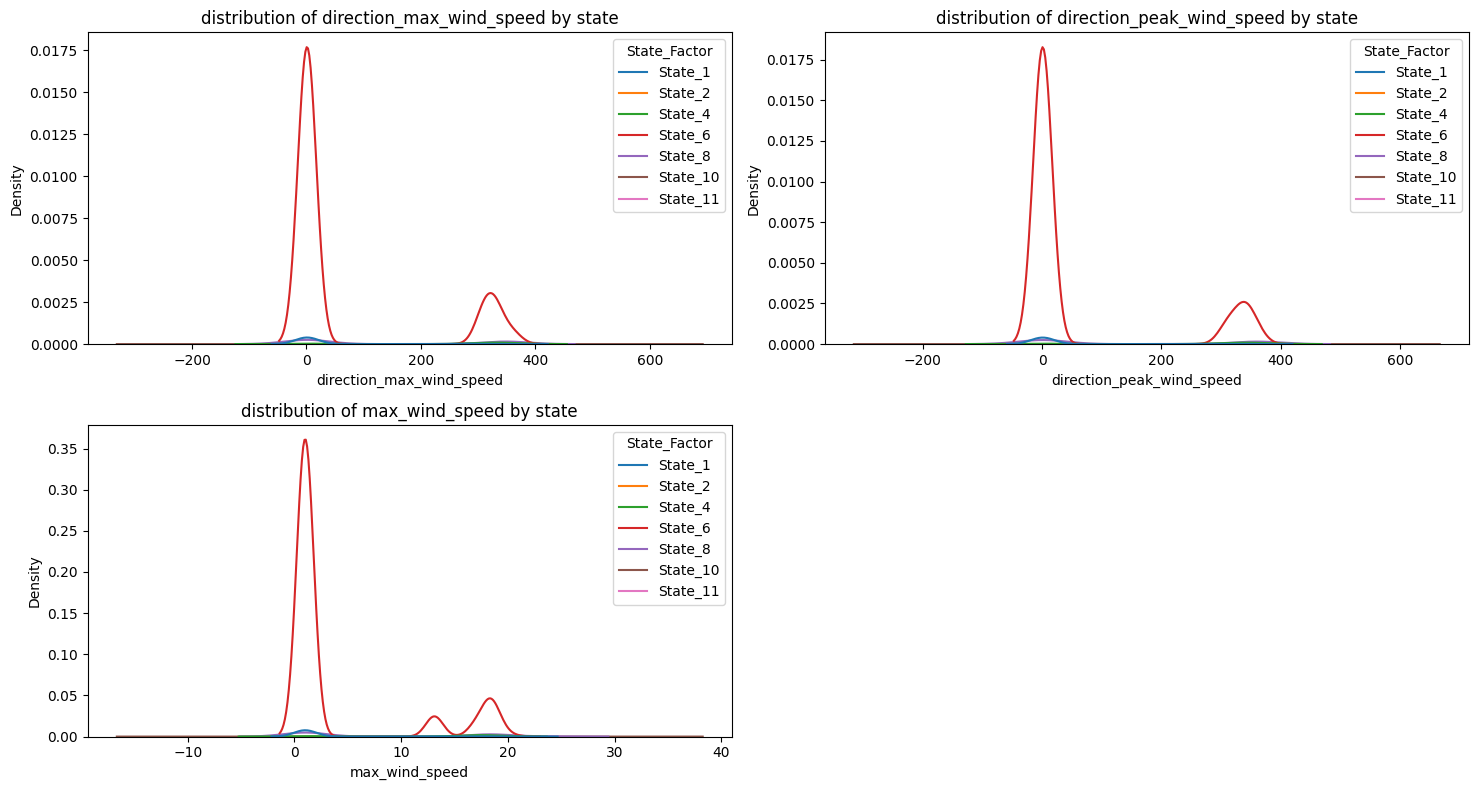

In [144]:
fig, axs = plt.subplots(2, 2, figsize=(15,8))

for i, column in enumerate(wind_cols):
    sns.kdeplot(data=train_df, x=column, hue='State_Factor', ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f'distribution of {column} by state')
    
plt.tight_layout()
plt.delaxes(axs[1,1])
plt.show()

### 8 | Fog

/home/saori/.pyenv/versions/lewagon/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


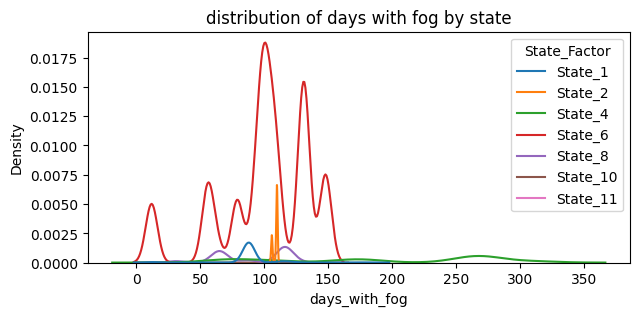

In [148]:
sns.kdeplot(data=train_df, x='days_with_fog', hue='State_Factor')
plt.title(f'distribution of days with fog by state')
fig = plt.gcf()
fig.set_size_inches(7,3)

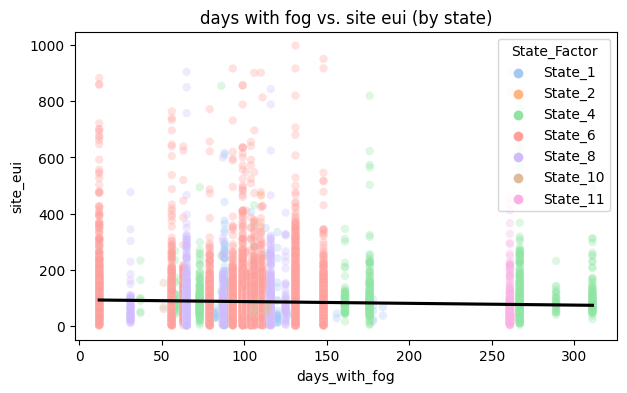

In [149]:
sns.scatterplot(
    data=train_df, x='days_with_fog', y='site_eui', hue='State_Factor', 
    palette='pastel',
    alpha=.3,
    linewidth=.1,
    )
sns.regplot(
    data=train_df, x='days_with_fog', y='site_eui', 
    scatter=False,
    line_kws={'color':'black'},
    )
plt.title(f"days with fog vs. site eui (by state)")

fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.show()

## Correlation

In [150]:
corr_train_df = train_df.drop(columns='id').corr()
corr_site_eui = corr_train_df.filter(items=['site_eui'], axis=0)

/tmp/ipykernel_1676/237534434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_train_df = train_df.drop(columns='id').corr()


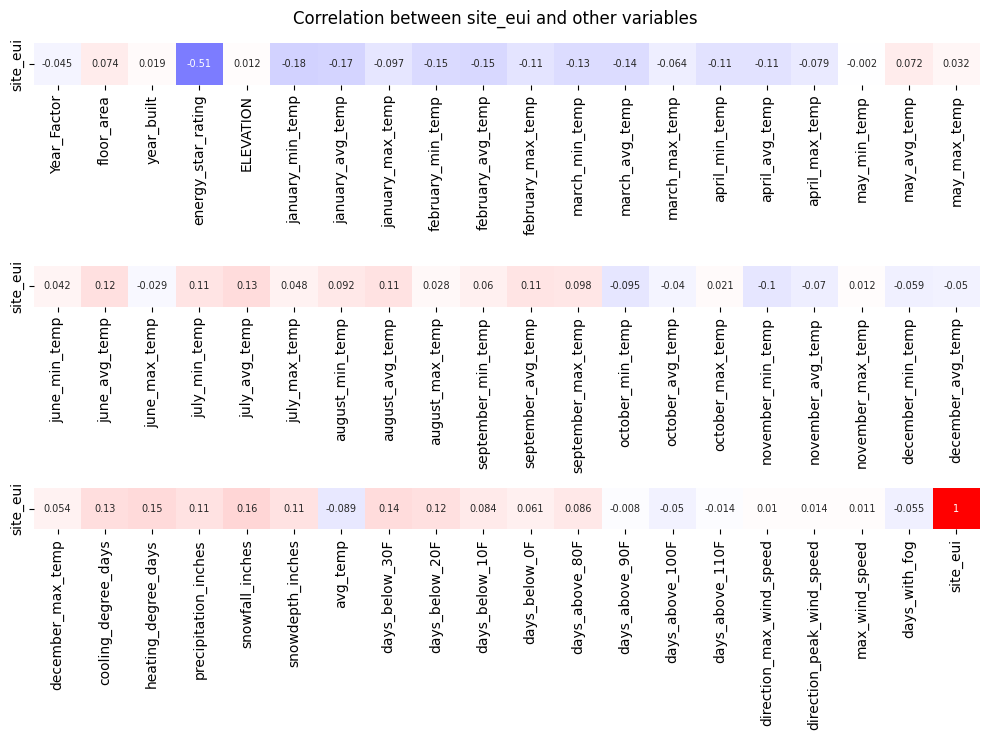

In [151]:
import matplotlib.colors as mcolors

fig, axs = plt.subplots(3, 1, figsize=(10, 7.5), sharey=True)
norm = mcolors.Normalize(-1, 1)

sns.heatmap(corr_site_eui.iloc[:, :20], annot=True, annot_kws={'size':7}, cmap='bwr', ax=axs[0], norm=norm, cbar=False)
sns.heatmap(corr_site_eui.iloc[:, 20:40], annot=True, annot_kws={'size':7}, cmap='bwr', ax=axs[1], norm=norm, cbar=False)
sns.heatmap(corr_site_eui.iloc[:, 40:], annot=True, annot_kws={'size':7}, cmap='bwr', ax=axs[2], norm=norm, cbar=False)

plt.suptitle('Correlation between site_eui and other variables')
plt.tight_layout()
plt.show()

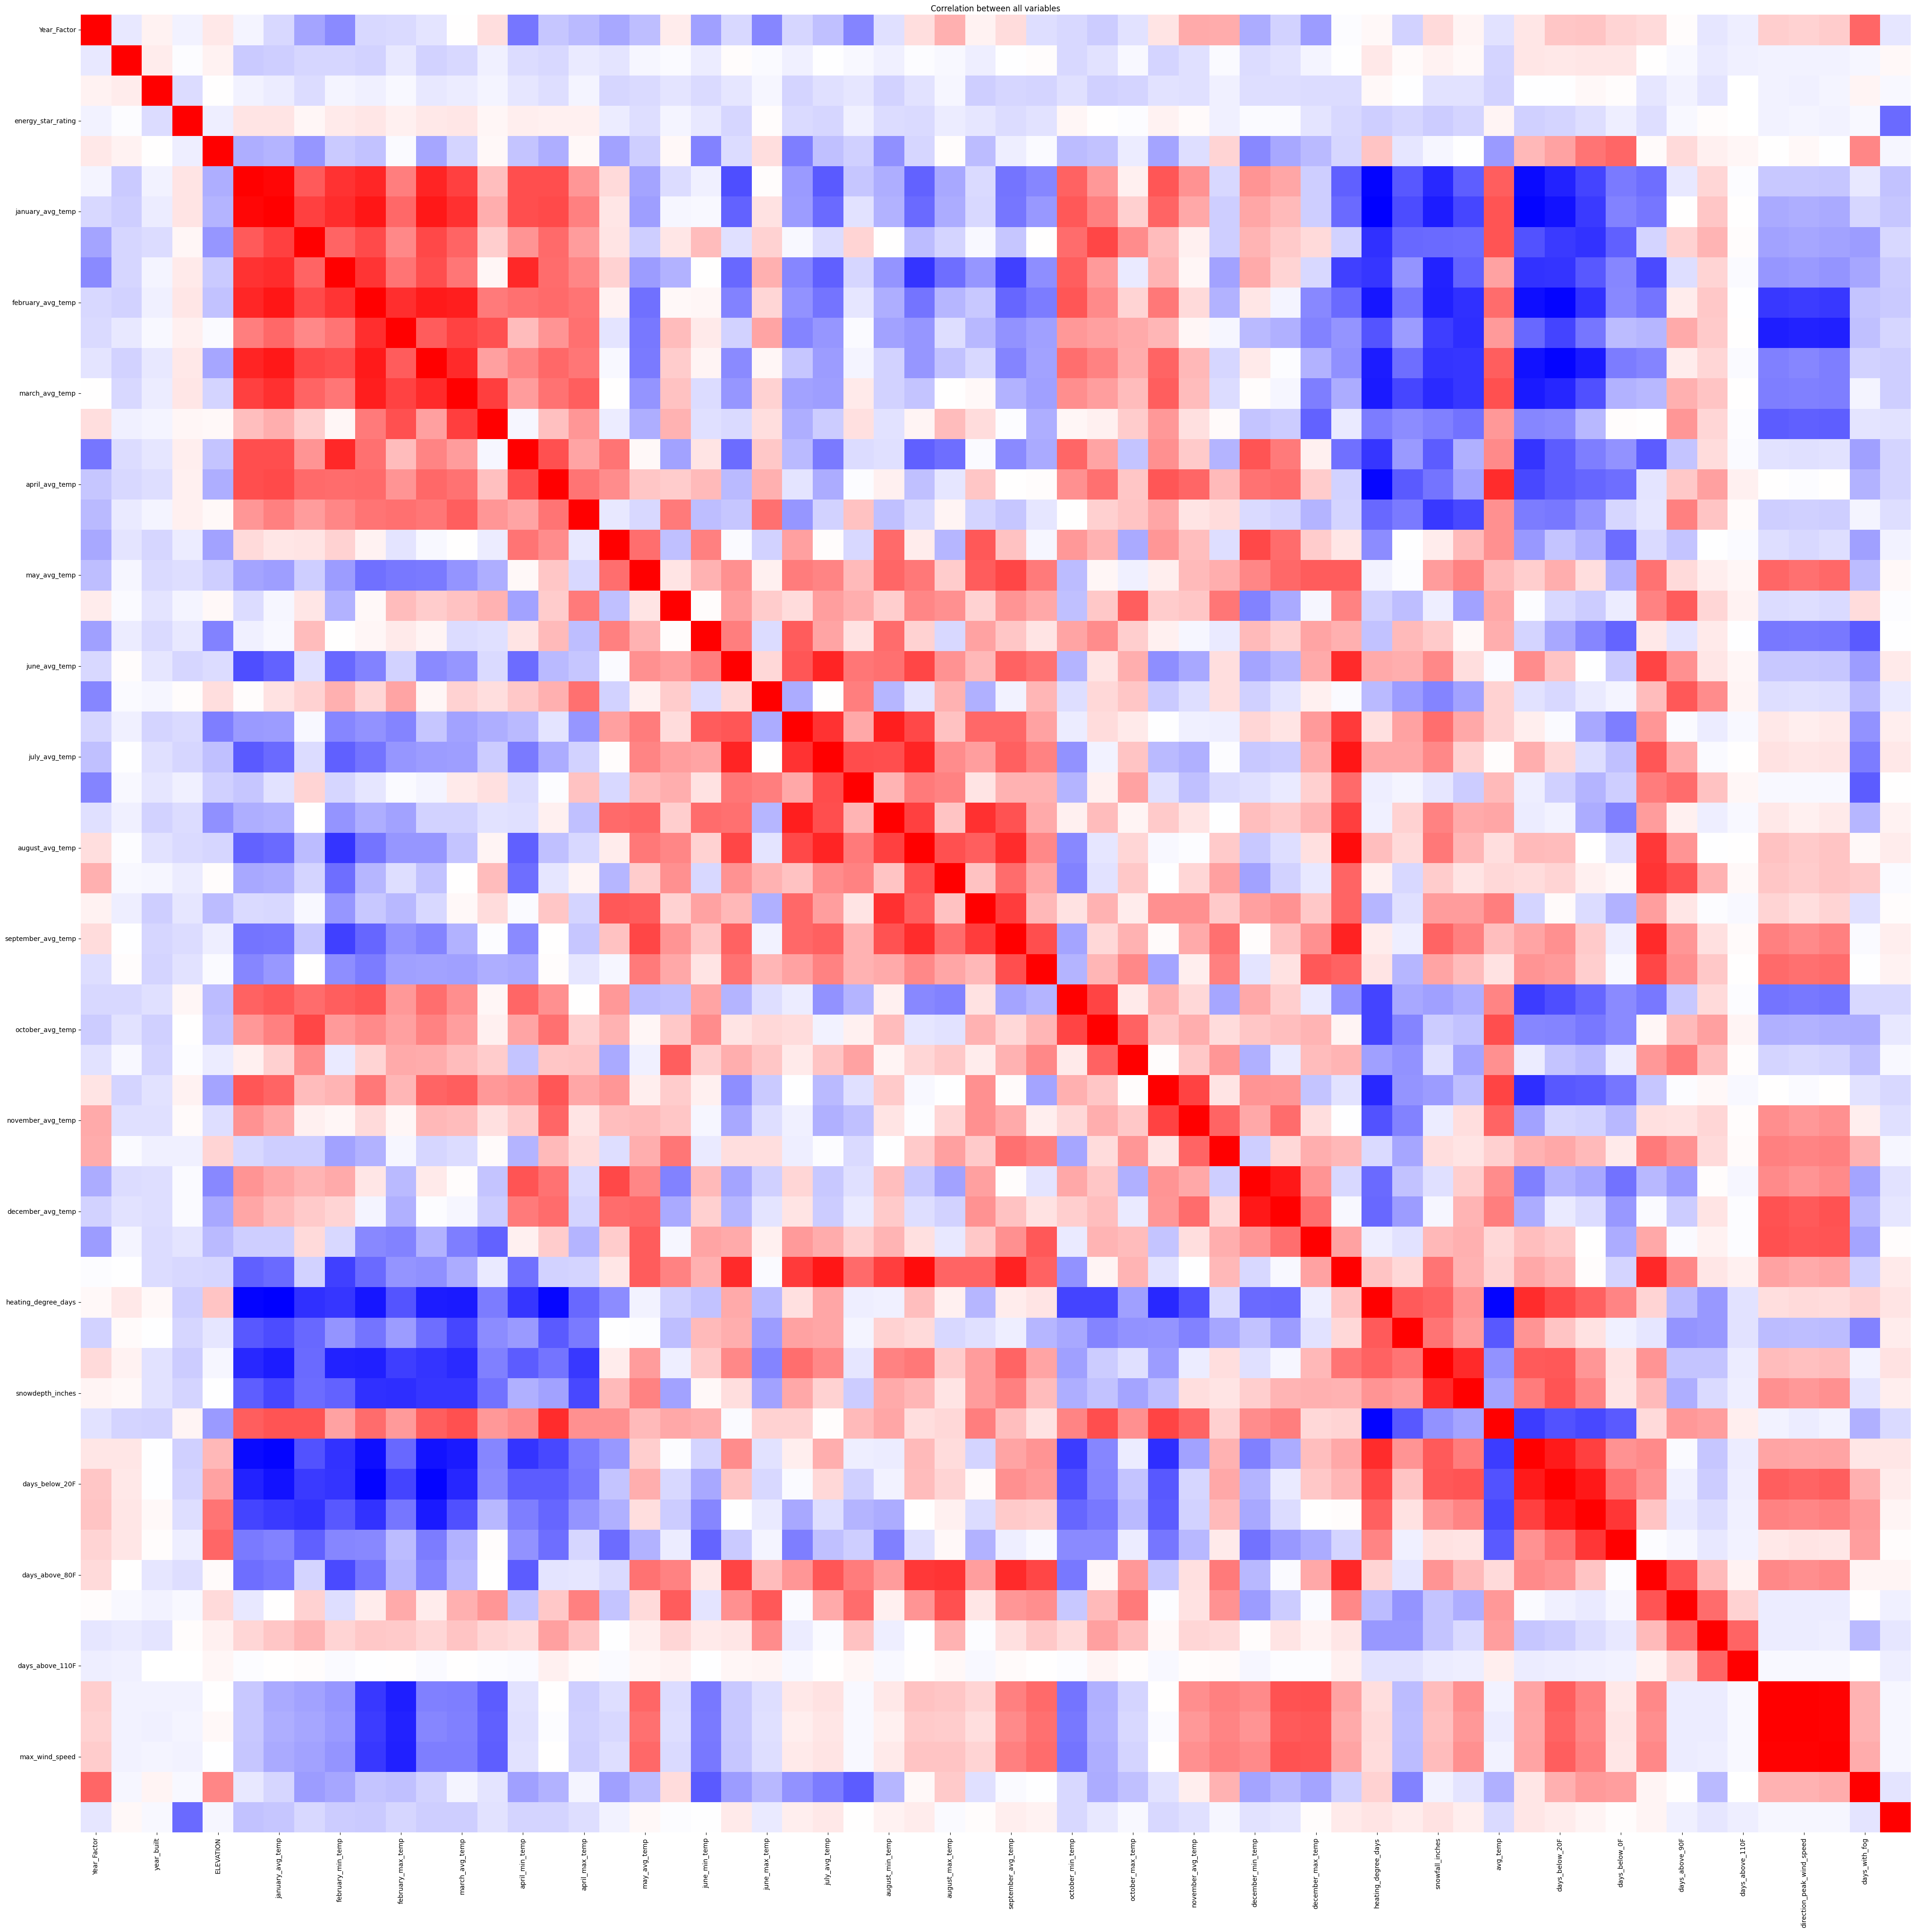

In [169]:
sns.heatmap(
    corr_train_df, 
    annot=False, 
    annot_kws={'size':7}, 
    cmap='bwr',
    cbar=False,
    )
fig = plt.gcf()
fig.set_size_inches(50, 50)
plt.title('Correlation between all variables')
plt.show()

# Recap of EDA

- The data include 61 features, `site_eui` and `id` columns
- The train set contains 75,757 data points; the test set 9,705 (~11.4%)
- 50~60% of `days_with_fog` and wind related data is missing in the train set
    - This goes up to around 90% in the test set
- `energy_star_rating` also has 35% of data missing in the train set
    - 23% in the test set
- The train set contains data from Year 1-6; there are more data points from the more recent years (assuming year 6 is the most recent). The test set contains data from Year 7
- The train set consists largely of State 8 data (~70%); in the test set, ~60% of the data is from State 4 and 11
- State 4 has the highest mean `site_eui`, followed by State 6 and 8; State 11 has the lowest
- ~60% of the train data is from residential buildings and the rest is from commercial buildings. This pattern is reversed in the test set
- Around 50% of the train set is of building class `Multifamily_Uncategorized`
- Based on regplots (linear regression), the following appear to be related to higher `site_eui`: extremely large `floor_area`,  older buildings (when considering `year_built` after 1970), lower `energy_star_rating`, higher `ELEVATION`, lower `avg_temp` / more days below 30/20/10/0F degrees, more `cooling_degree_days` and `heating_degree_days`, more snowfall, more precipitation
- `Energy_star_rating` has the highest correlation coefficient (-.51), which is much higher than other variables
- Other variables with relatively high correlation coefficients are: `january_min_temp` (-.18), `january_avg_temp` (-.17), `february_min_temp` (-.15), `february_avg_temp` (-.15), `heating_degree_days` (.15), `snowfall_inches` (.16)
- Monthly average temperature variables have correlation coefficients in the range of .04 ~ .17, with peak summer/winter months having higher correlation coefficients
- Monthly minimum temperature variables have higher correlation coefficients in winter months (Jan~Apr; .11 ~ .18). Maximum temperature variables have overall relatively lower coefficients, with the highest at .11 in February